In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.14 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.5/78.2 GB disk)


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LnOBTMVYigDpNXXUcaMy")
project = rf.workspace("helmetdetection-kshhr").project("helmet_v3")
dataset = project.version(1).download("yolov8")


/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=fdd86004c5255ee9a92cf4532deb5ee19648763cc834e500dd9fb9b893f16c31
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.14
    Uninstalling urllib3-1.26.14:
      Successfully uninstalled urllib3-1.26.14
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
  

Extracting Dataset Version Zip to helmet_v3-1 in yolov8:: 100%|██████████| 2766/2766 [00:01<00:00, 2416.91it/s]


#TRAINING MODEL: 75 EPOCHS


In [ ]:
%cd {HOME}

from ultralytics import YOLO

model= YOLO()

model.train(data='/content/datasets/helmet_v3-1/data.yaml', epochs=75)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

/content


YOLOv8n summary: 225 layers, 3157200 parameters, 3157184 gradients, 8.9 GFLOPs

Ultralytics YOLOv8.0.14 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, data=/content/datasets/helmet_v3-1/data.yaml, epochs=75, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, classes=None, format=torchscript, keras=False, o

#RESULTS: 75 EPOCHS


/content


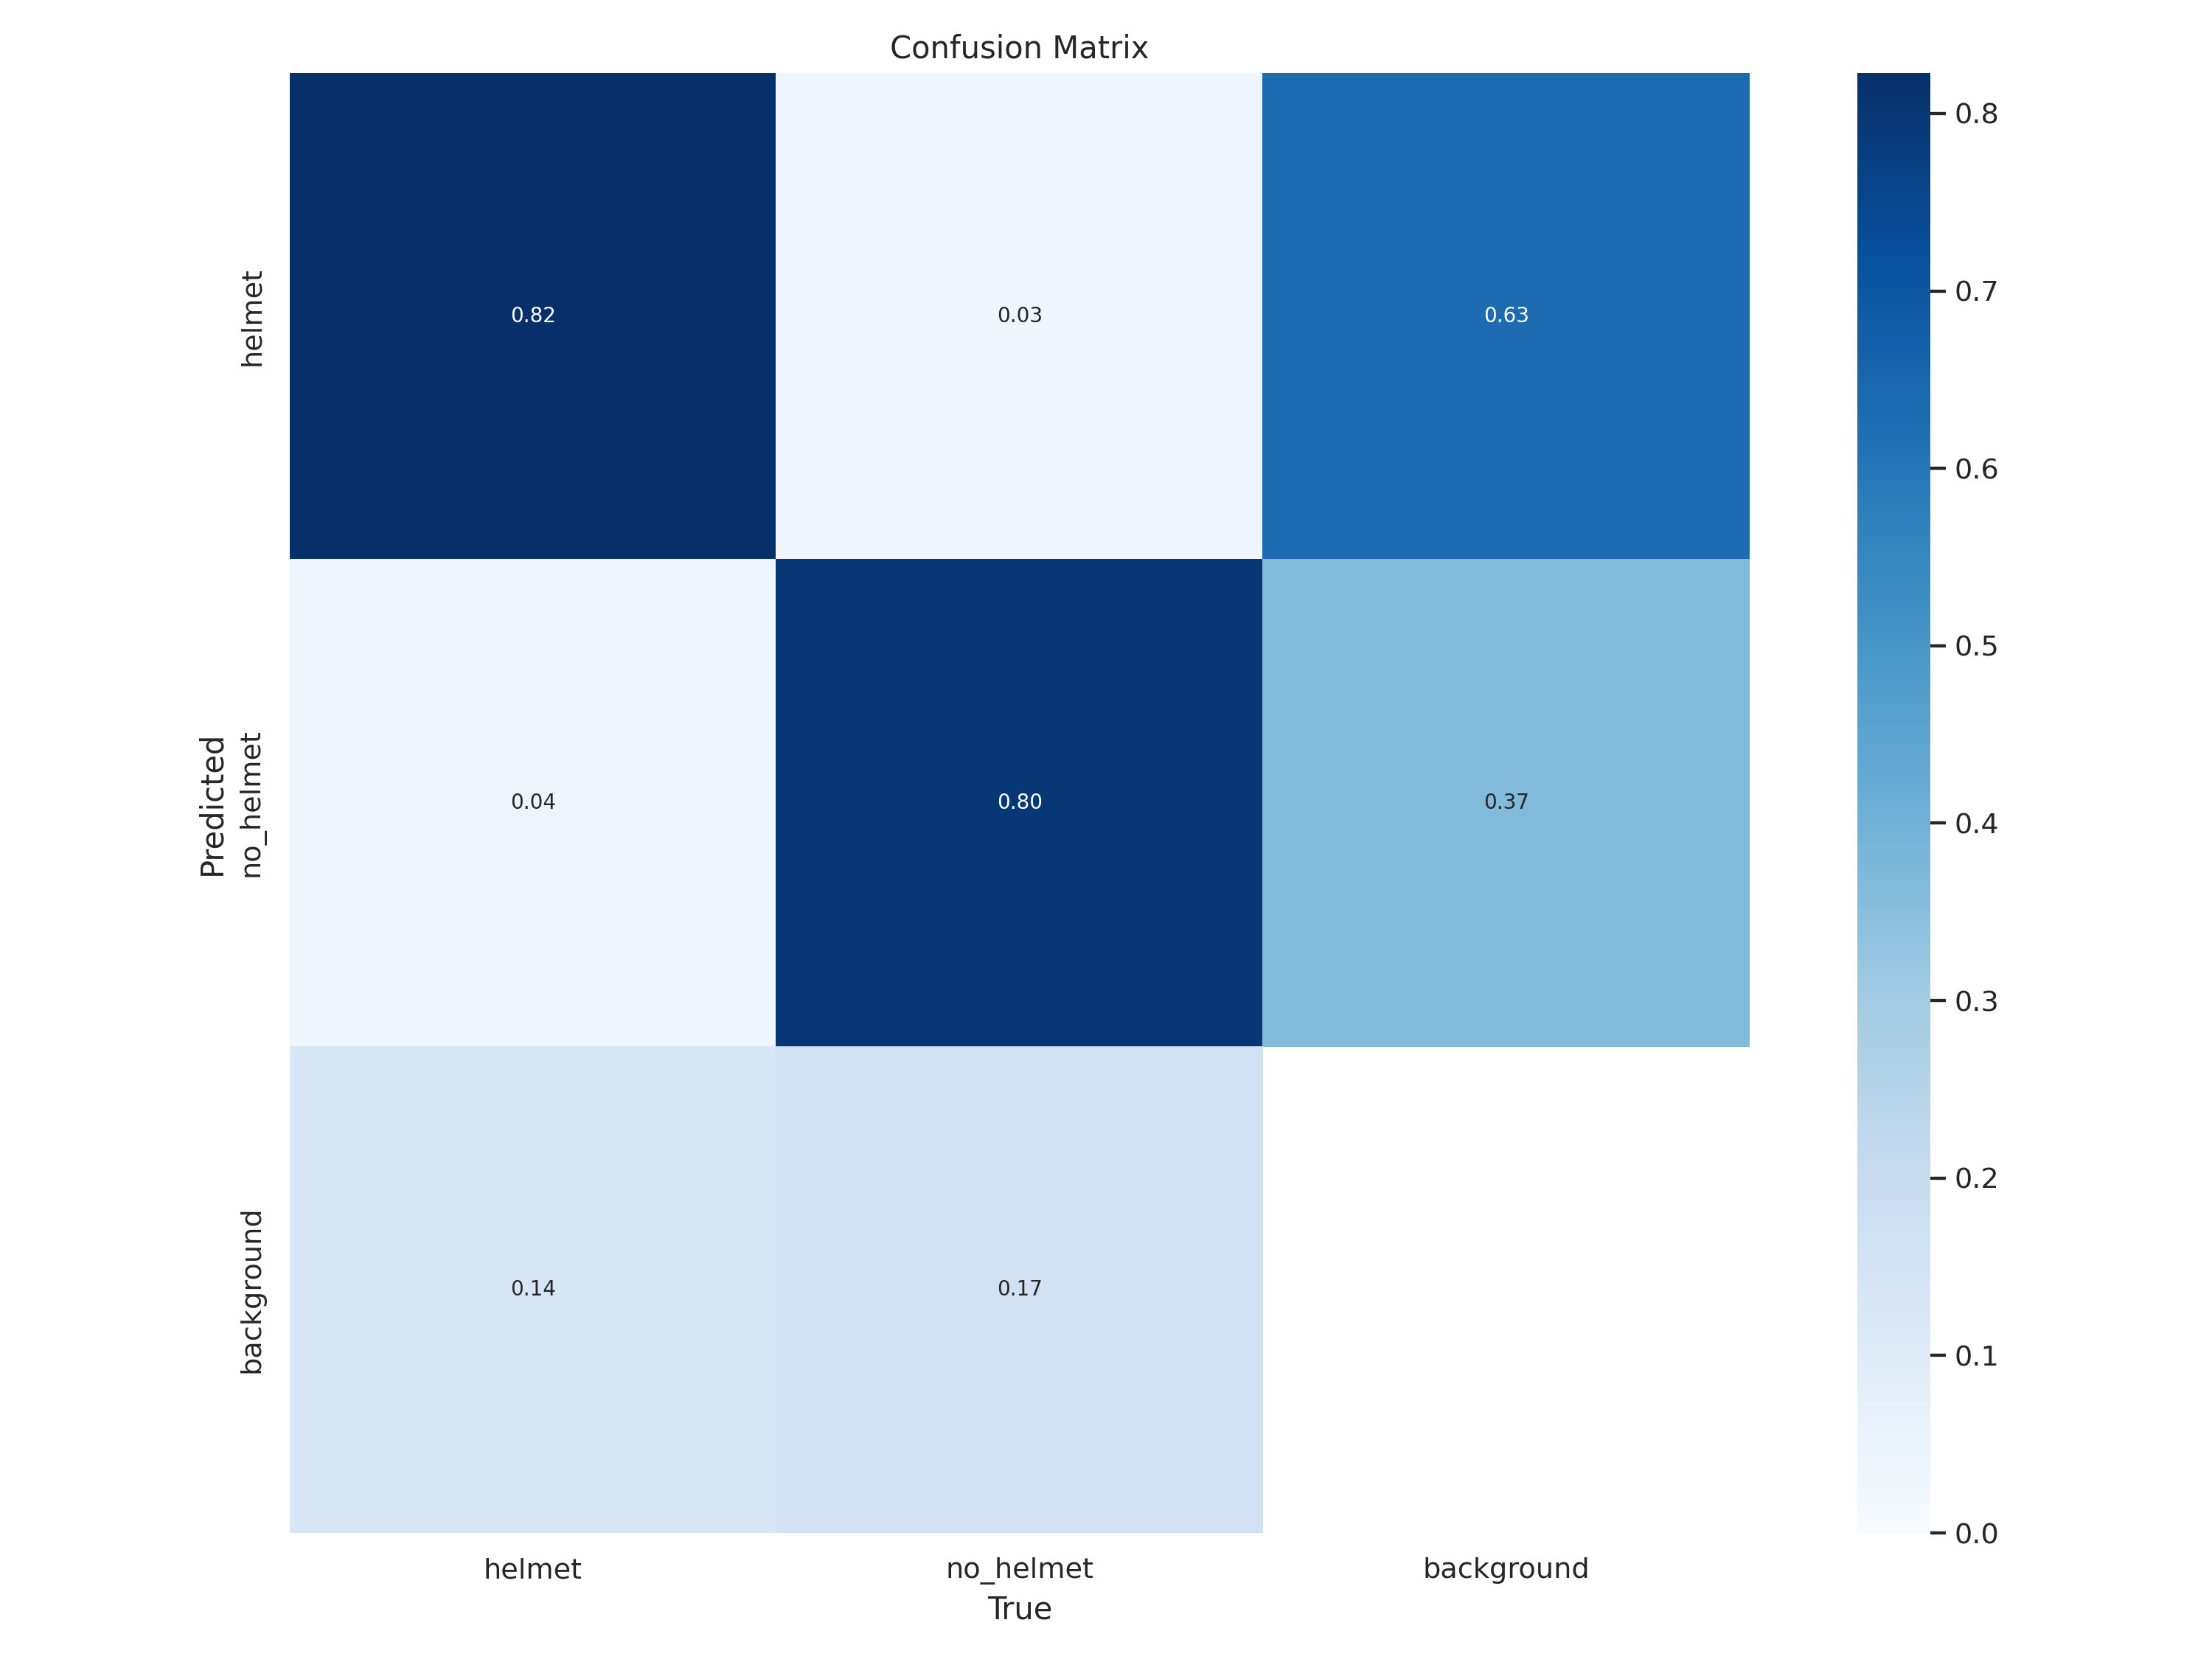

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


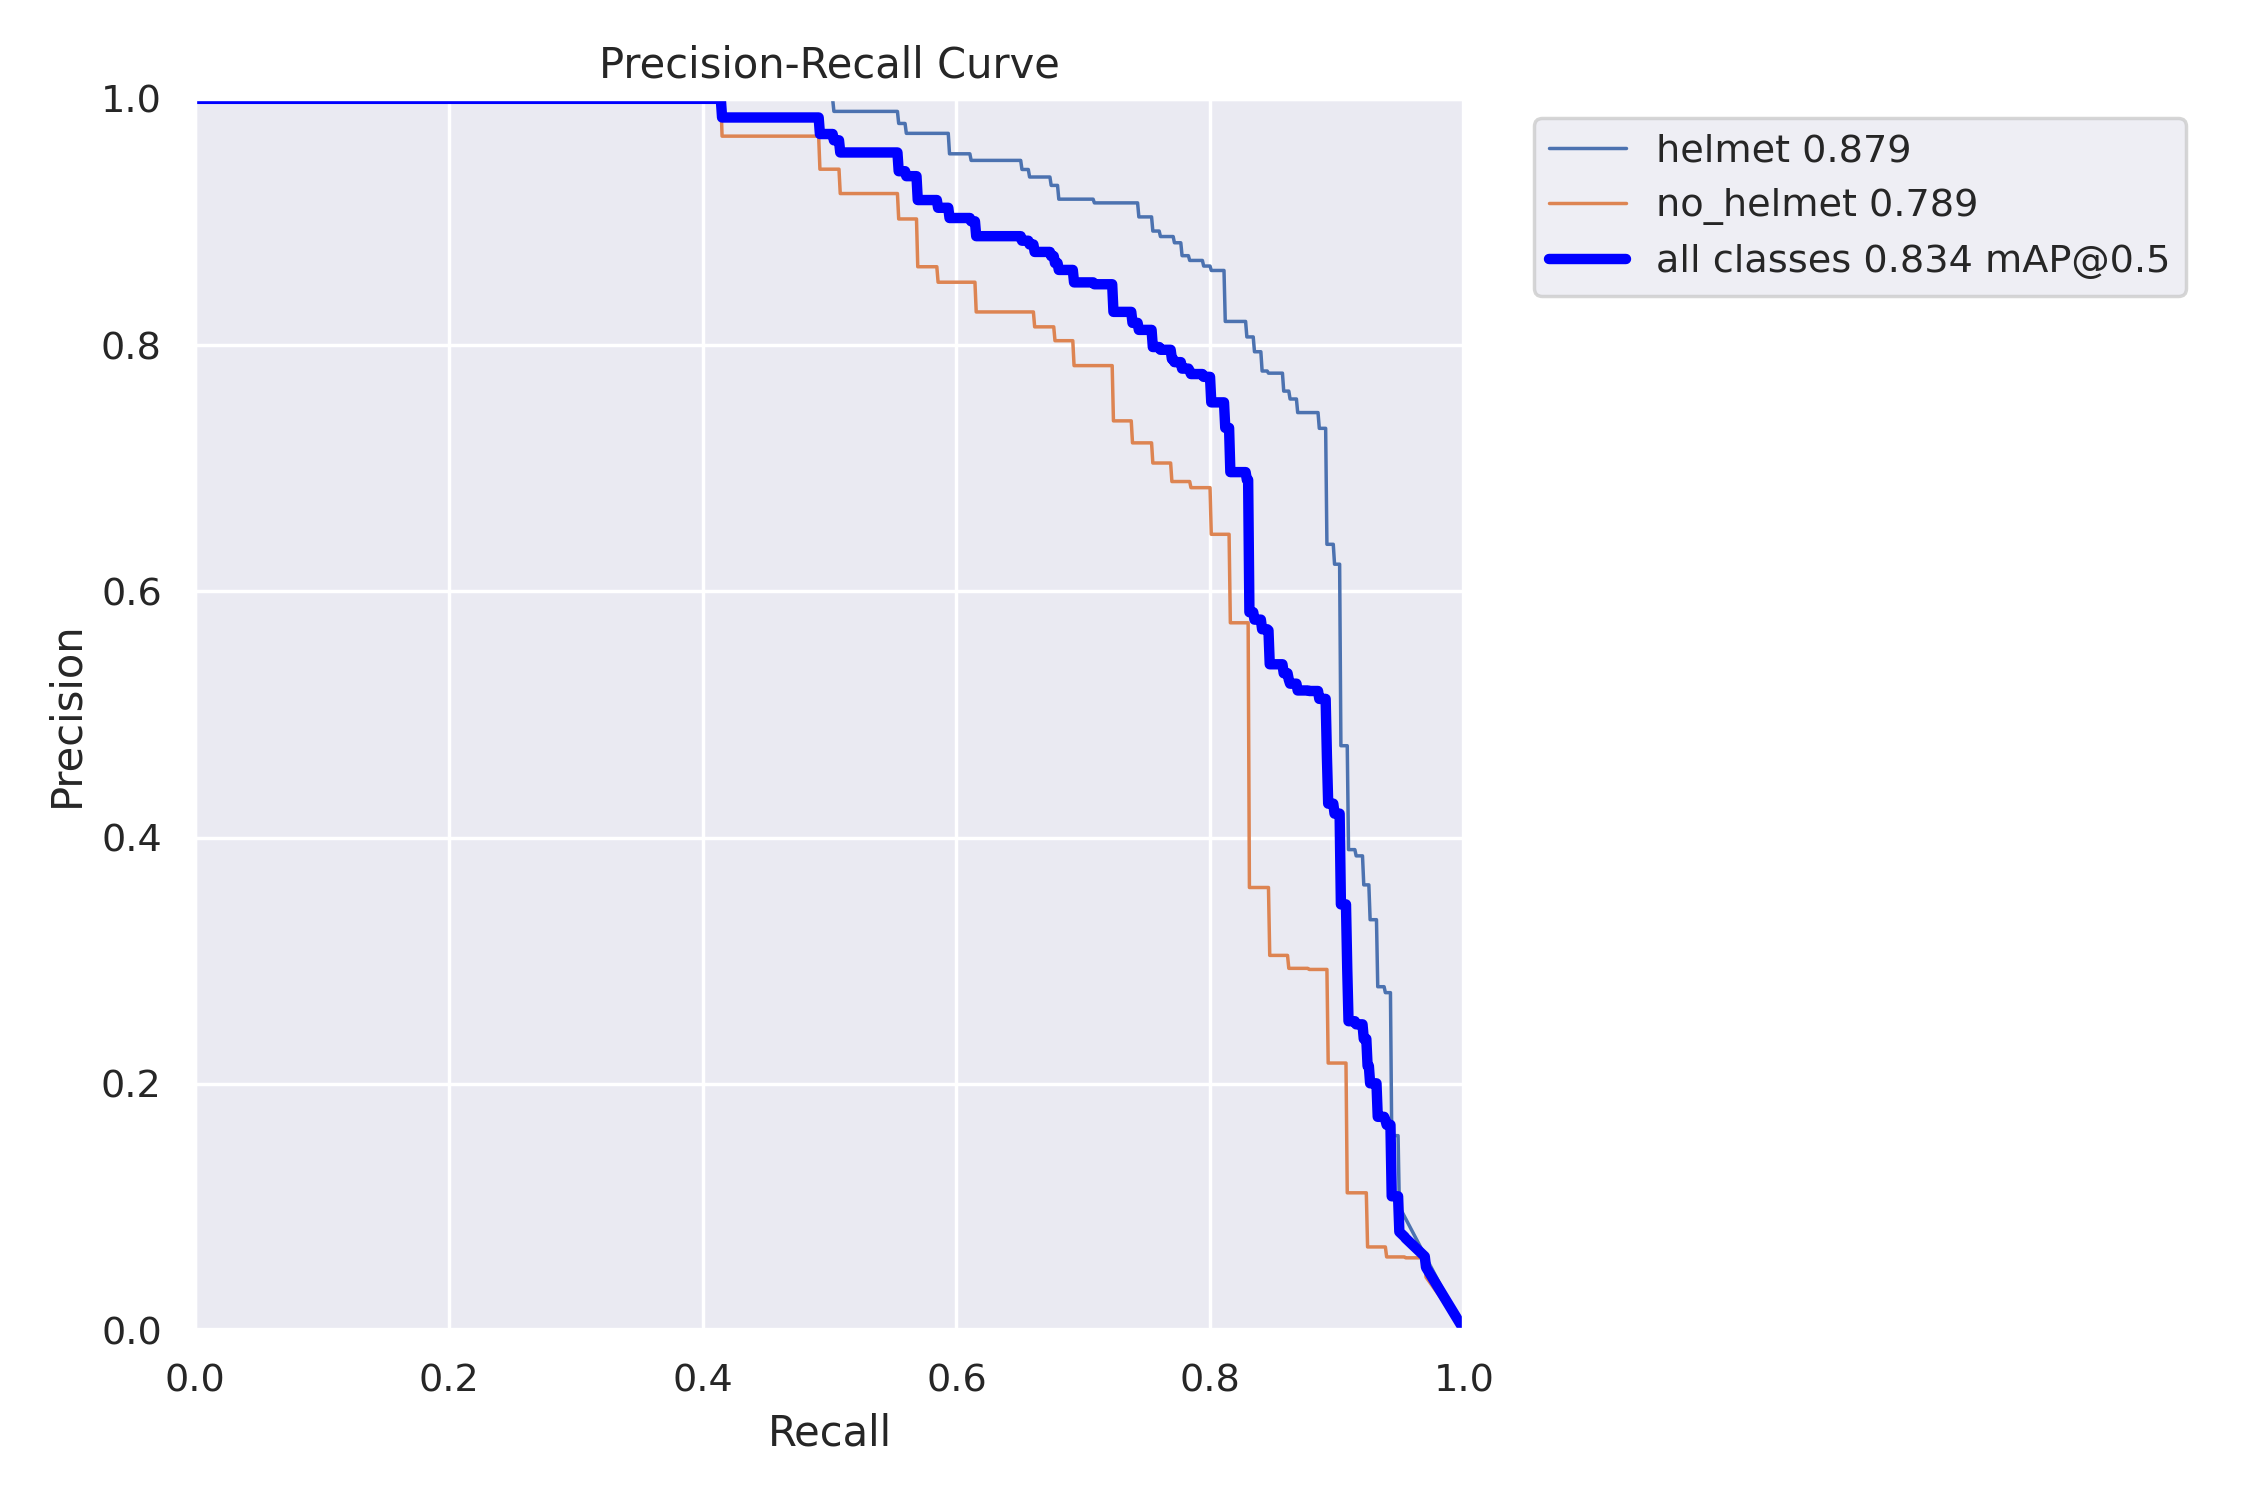

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/PR_curve.png', width=600)

/content


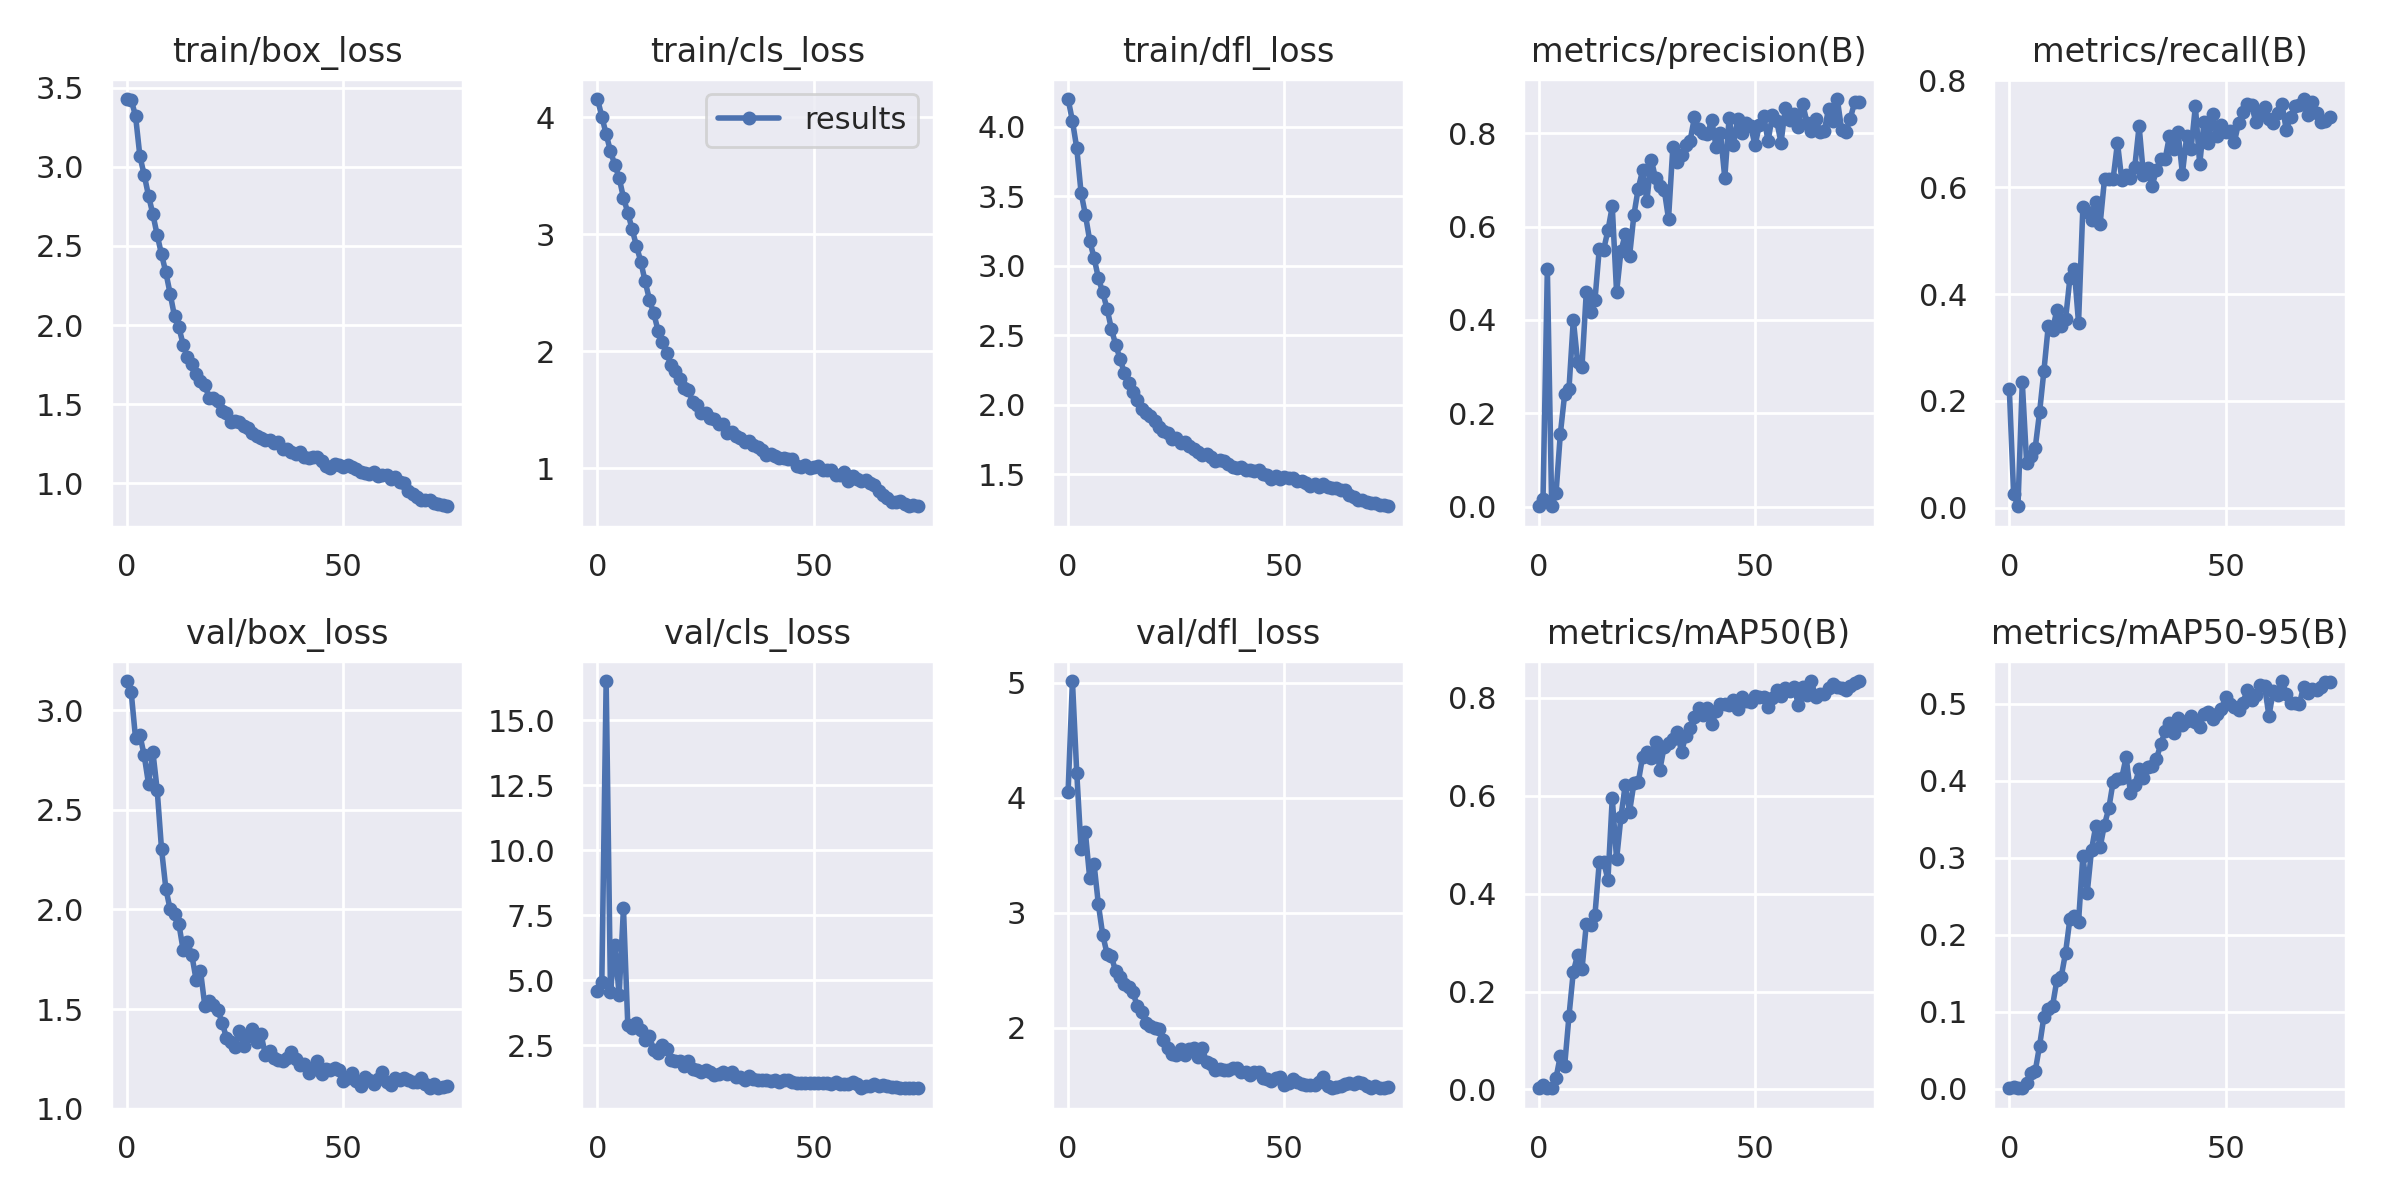

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


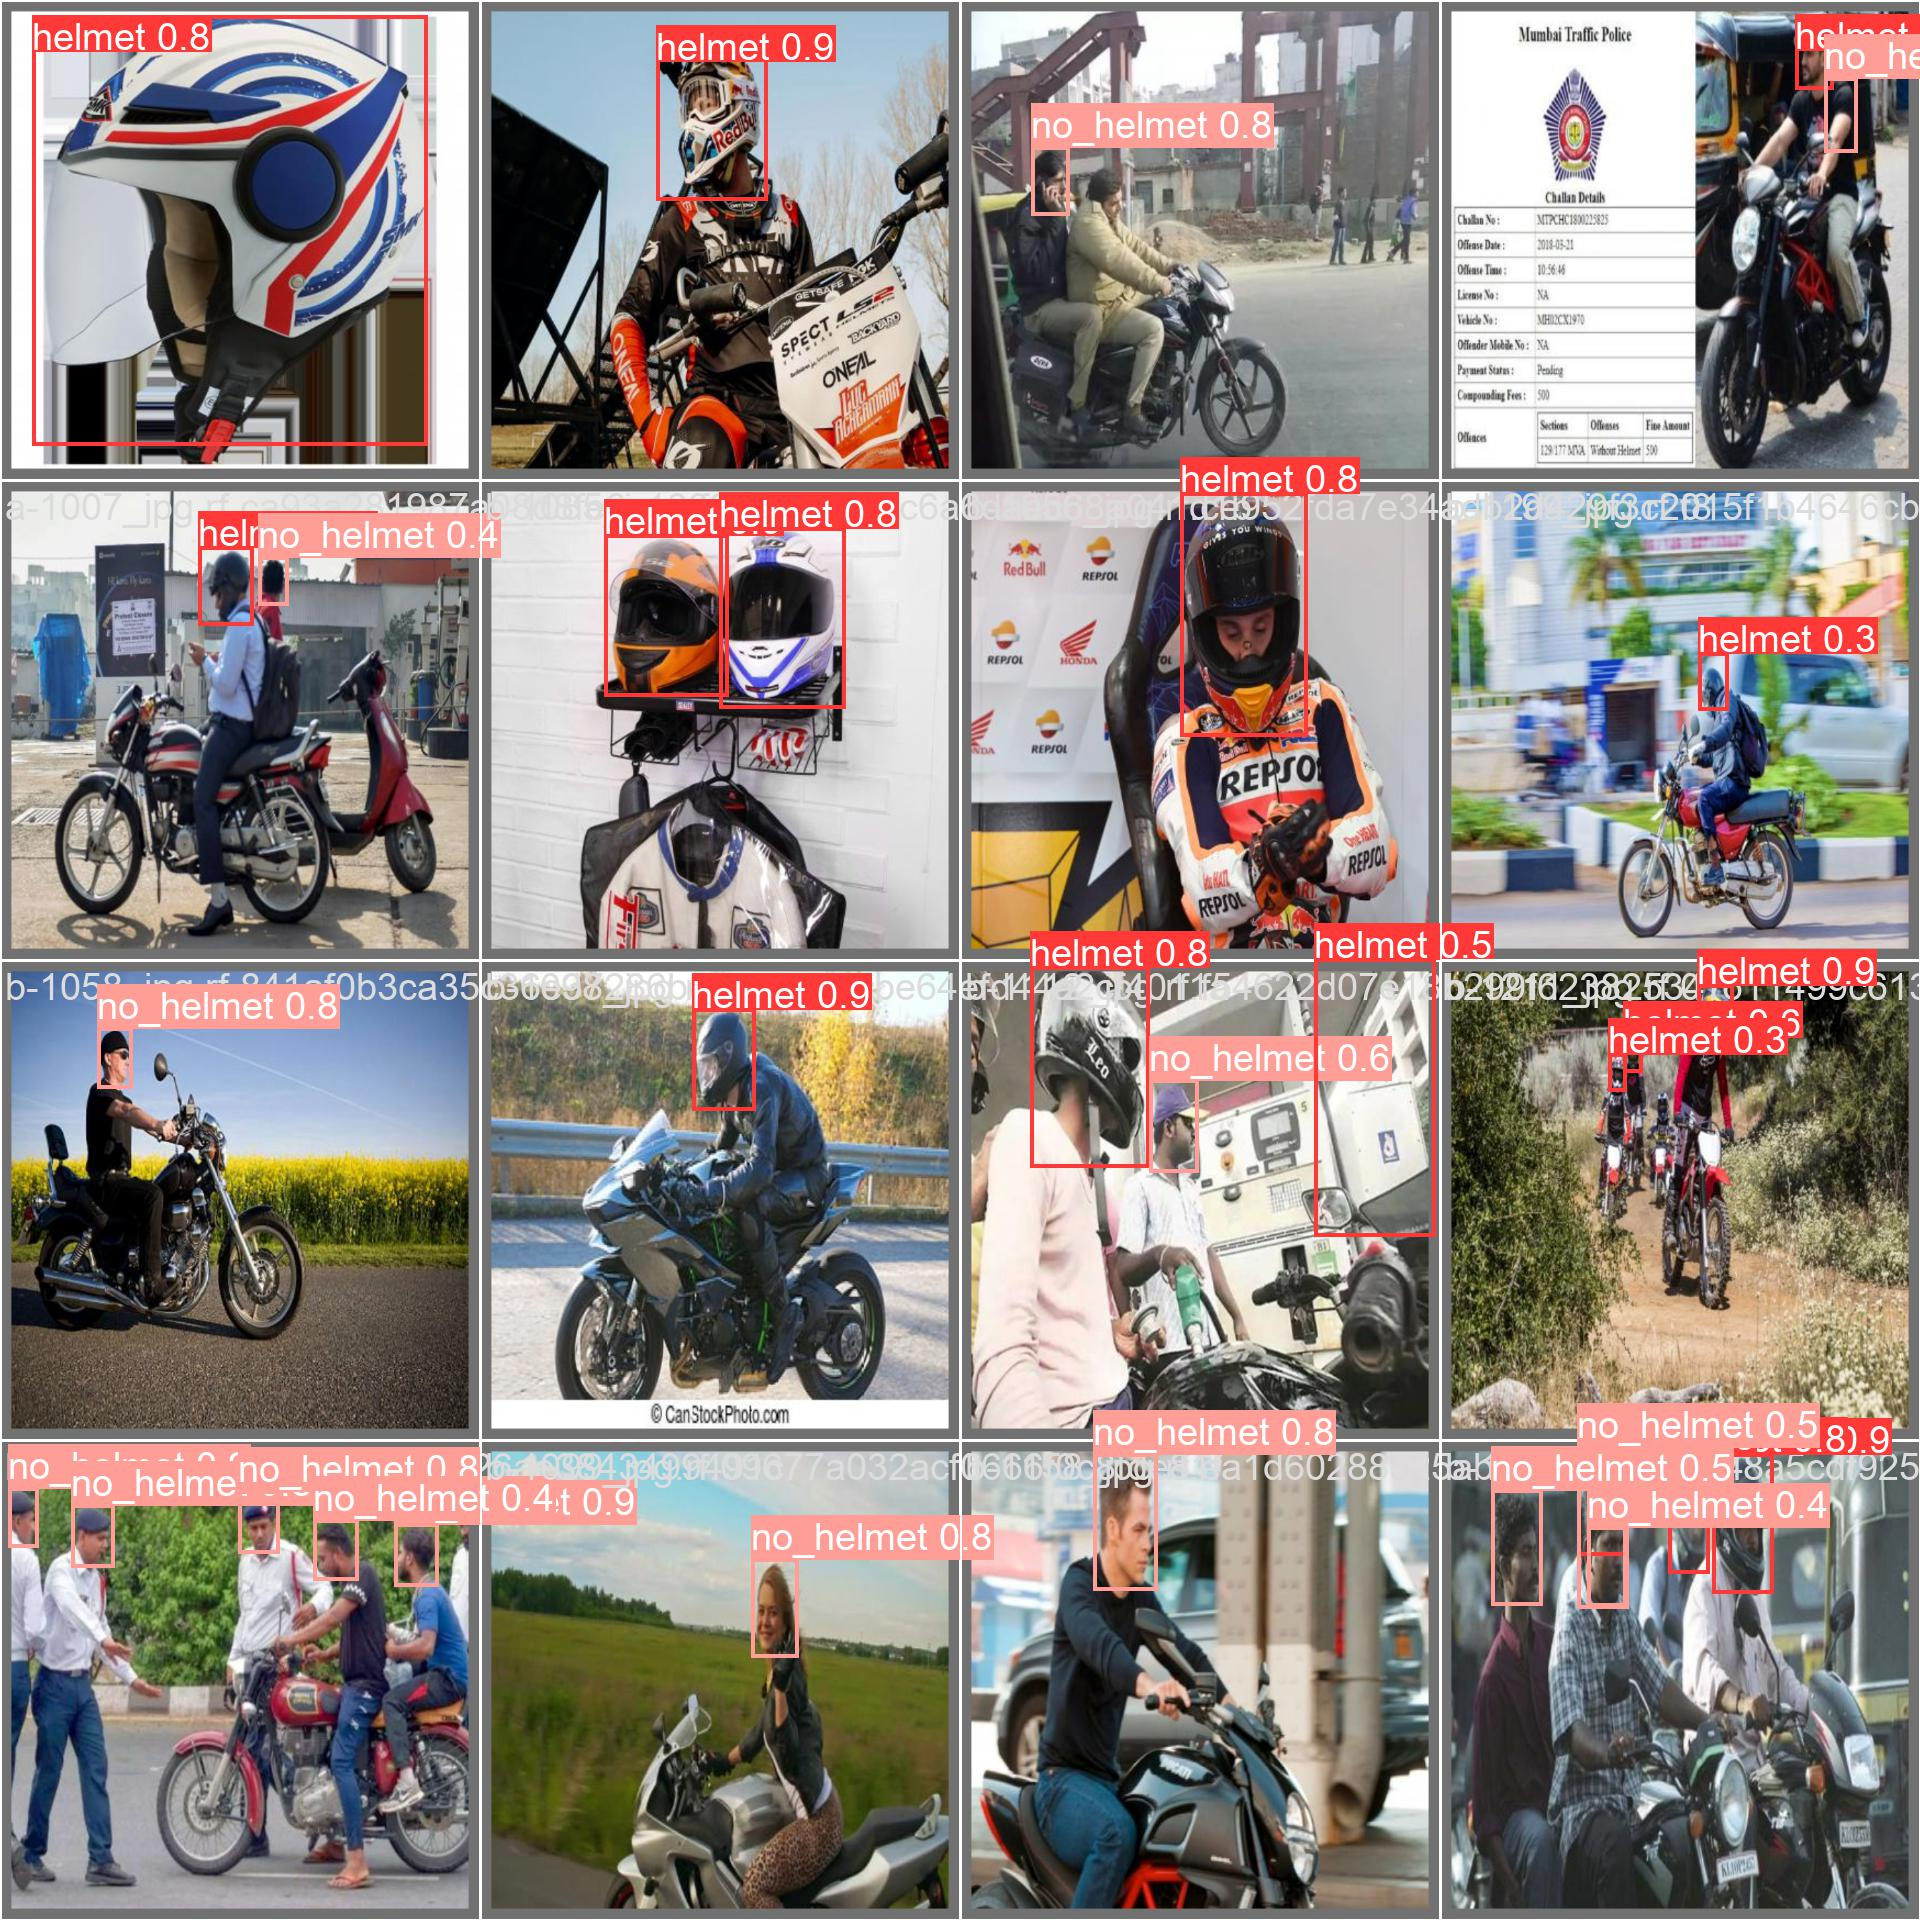

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

#VALIDATION: 75 EPOCHS

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model="/content/runs/detect/train2/weights/best.pt" data="/content/datasets/helmet_v3-1/data.yaml"

/content
Ultralytics YOLOv8.0.14 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/helmet_v3-1/valid/labels.cache... 162 images, 0 backgrounds, 0 corrupt: 100% 162/162 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:04<00:00,  2.64it/s]
                   all        162        240      0.809      0.765      0.835      0.528
                helmet        162        175      0.869      0.793      0.879      0.618
             no_helmet        162         65       0.75      0.738       0.79      0.438
Speed: 3.0ms pre-process, 5.2ms inference, 0.0ms loss, 2.3ms post-process per image


/content


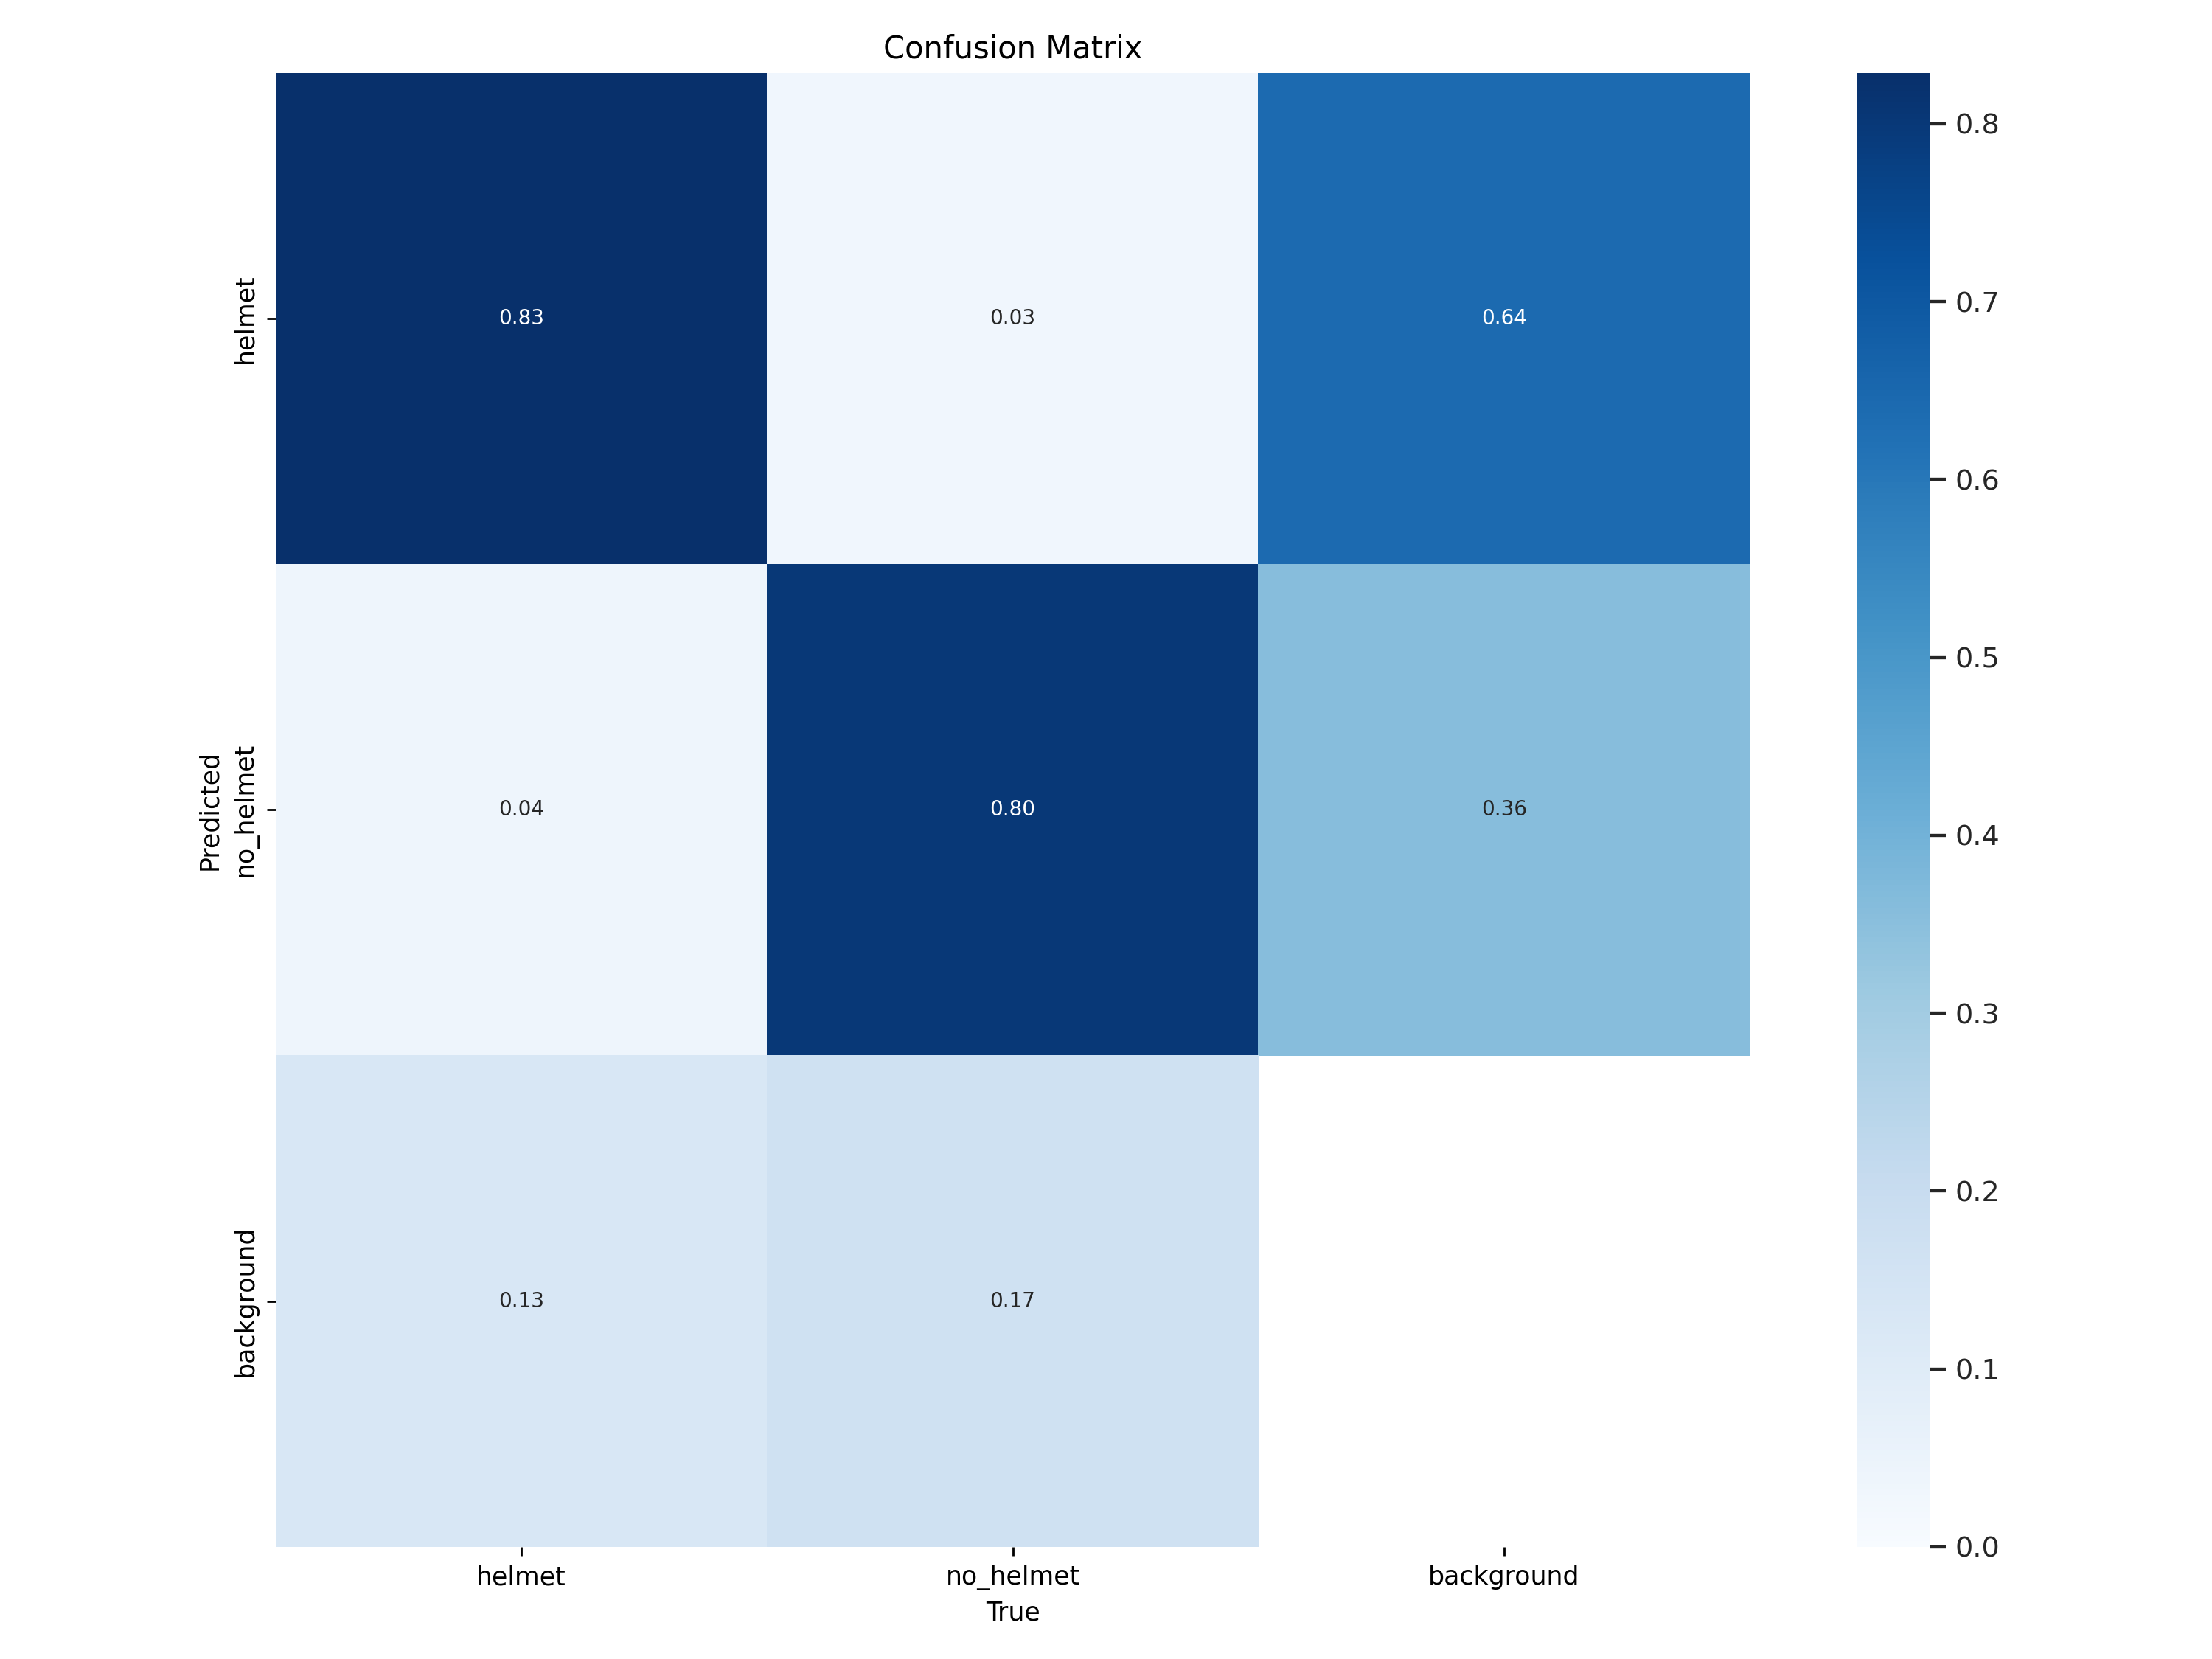

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=600)

/content


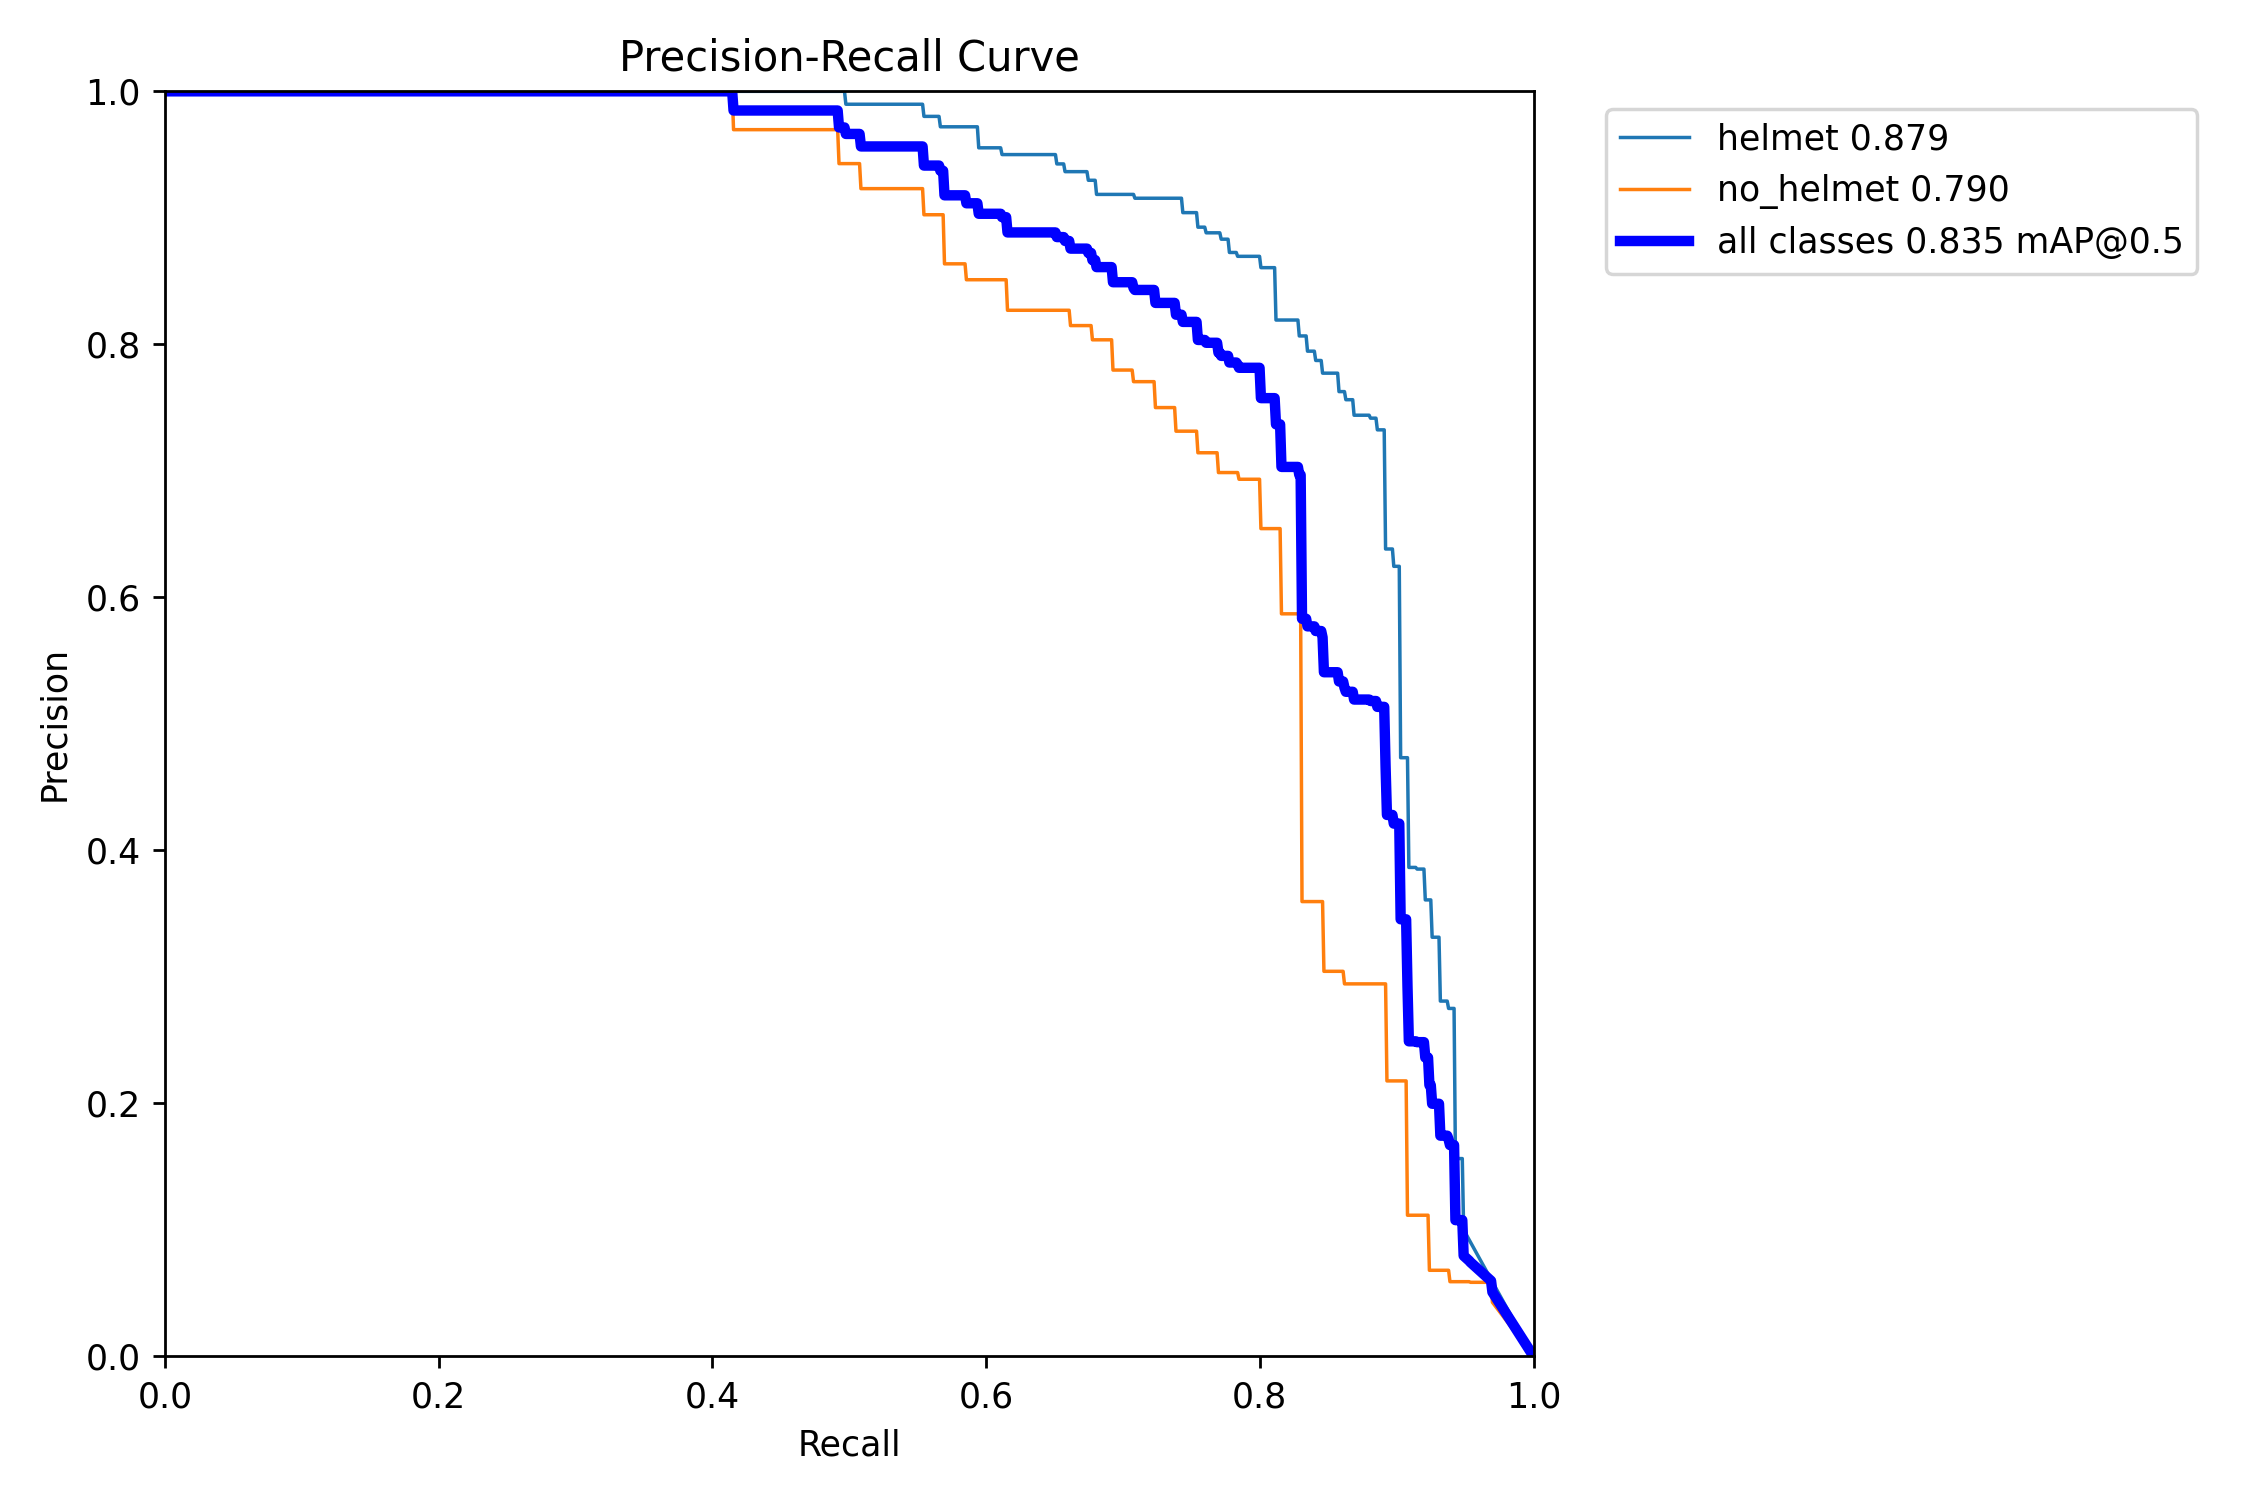

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/PR_curve.png', width=600)

#PREDICTION: 75 EPOCHS

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.14 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
image 1/79 /content/datasets/helmet_v3-1/test/images/a-1004_jpg.rf.e8c5e48c8ccecb5a4f6ef22093657663.jpg: 640x640 8.1ms
image 2/79 /content/datasets/helmet_v3-1/test/images/a-1005_jpg.rf.aaedbf736dc56ff298f9598b776dd475.jpg: 640x640 1 helmet, 8.8ms
image 3/79 /content/datasets/helmet_v3-1/test/images/a-1020_jpg.rf.d5166db4d6aebe32be0d95d9bbf117fa.jpg: 640x640 2 helmets, 9.6ms
image 4/79 /content/datasets/helmet_v3-1/test/images/a-1050_jpg.rf.3f6d0bc1b666c130f8962bb4eba3e5bc.jpg: 640x640 1 helmet, 8.3ms
image 5/79 /content/datasets/helmet_v3-1/test/images/a-1069_jpg.rf.fd4a4a8e8dde0688972167559dea5d99.jpg: 640x640 2 helmets, 8.5ms
image 6/79 /content/datasets/helmet_v3-1/test/images/a-1085_jpg.rf.b318b9f2985b4532e6982e3c1699a9c5.jpg: 640x640 3 helmets, 9.7ms
image 7/79 /content/datasets/helmet_v3-1/test/images/a-1

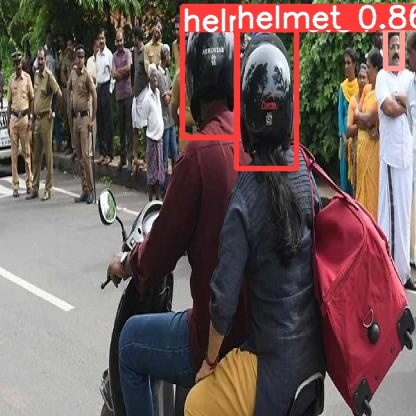

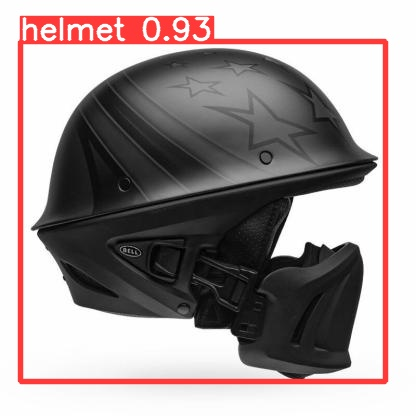

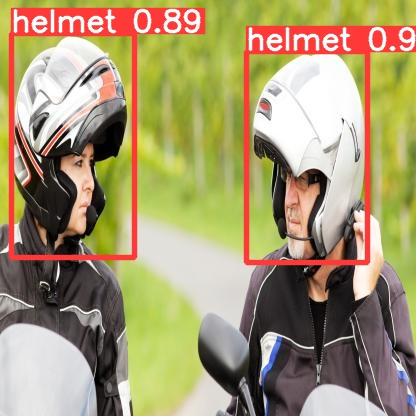

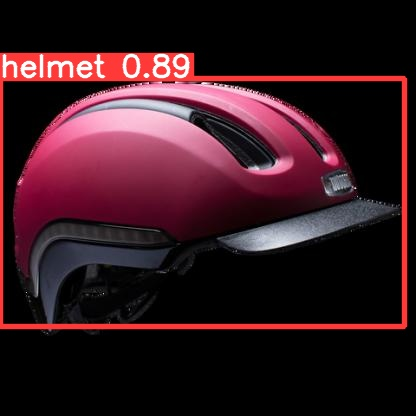

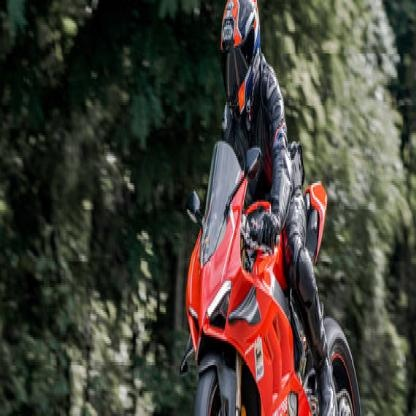

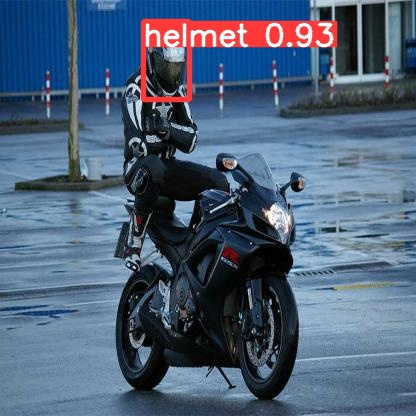

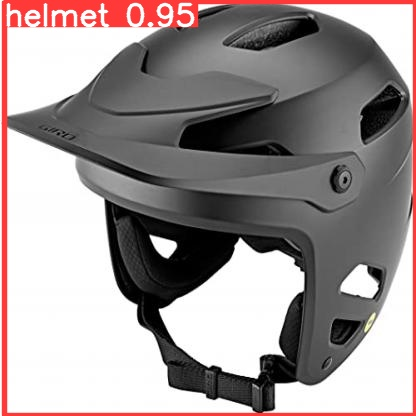

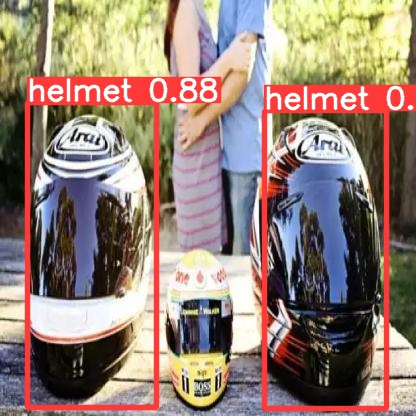

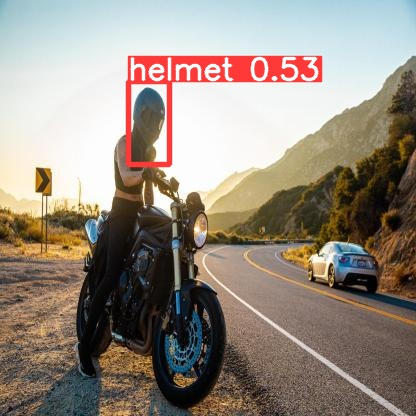

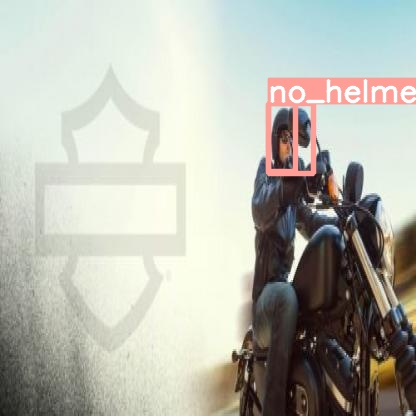

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

#MODEL TRAINING: 50 EPOCHS

In [ ]:
%cd {HOME}

from ultralytics import YOLO

model= YOLO()

model.train(data='/content/datasets/helmet_v3-1/data.yaml', epochs=50)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

/content


YOLOv8n summary: 225 layers, 3157200 parameters, 3157184 gradients, 8.9 GFLOPs

Ultralytics YOLOv8.0.14 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, data=/content/datasets/helmet_v3-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, classes=None, format=torchscript, keras=False, o

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.yaml data={dataset.location}/data.yaml epochs=50 imgsz=416

/content

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv             

#MODEL RESULTS: 50 EPOCHS


/content


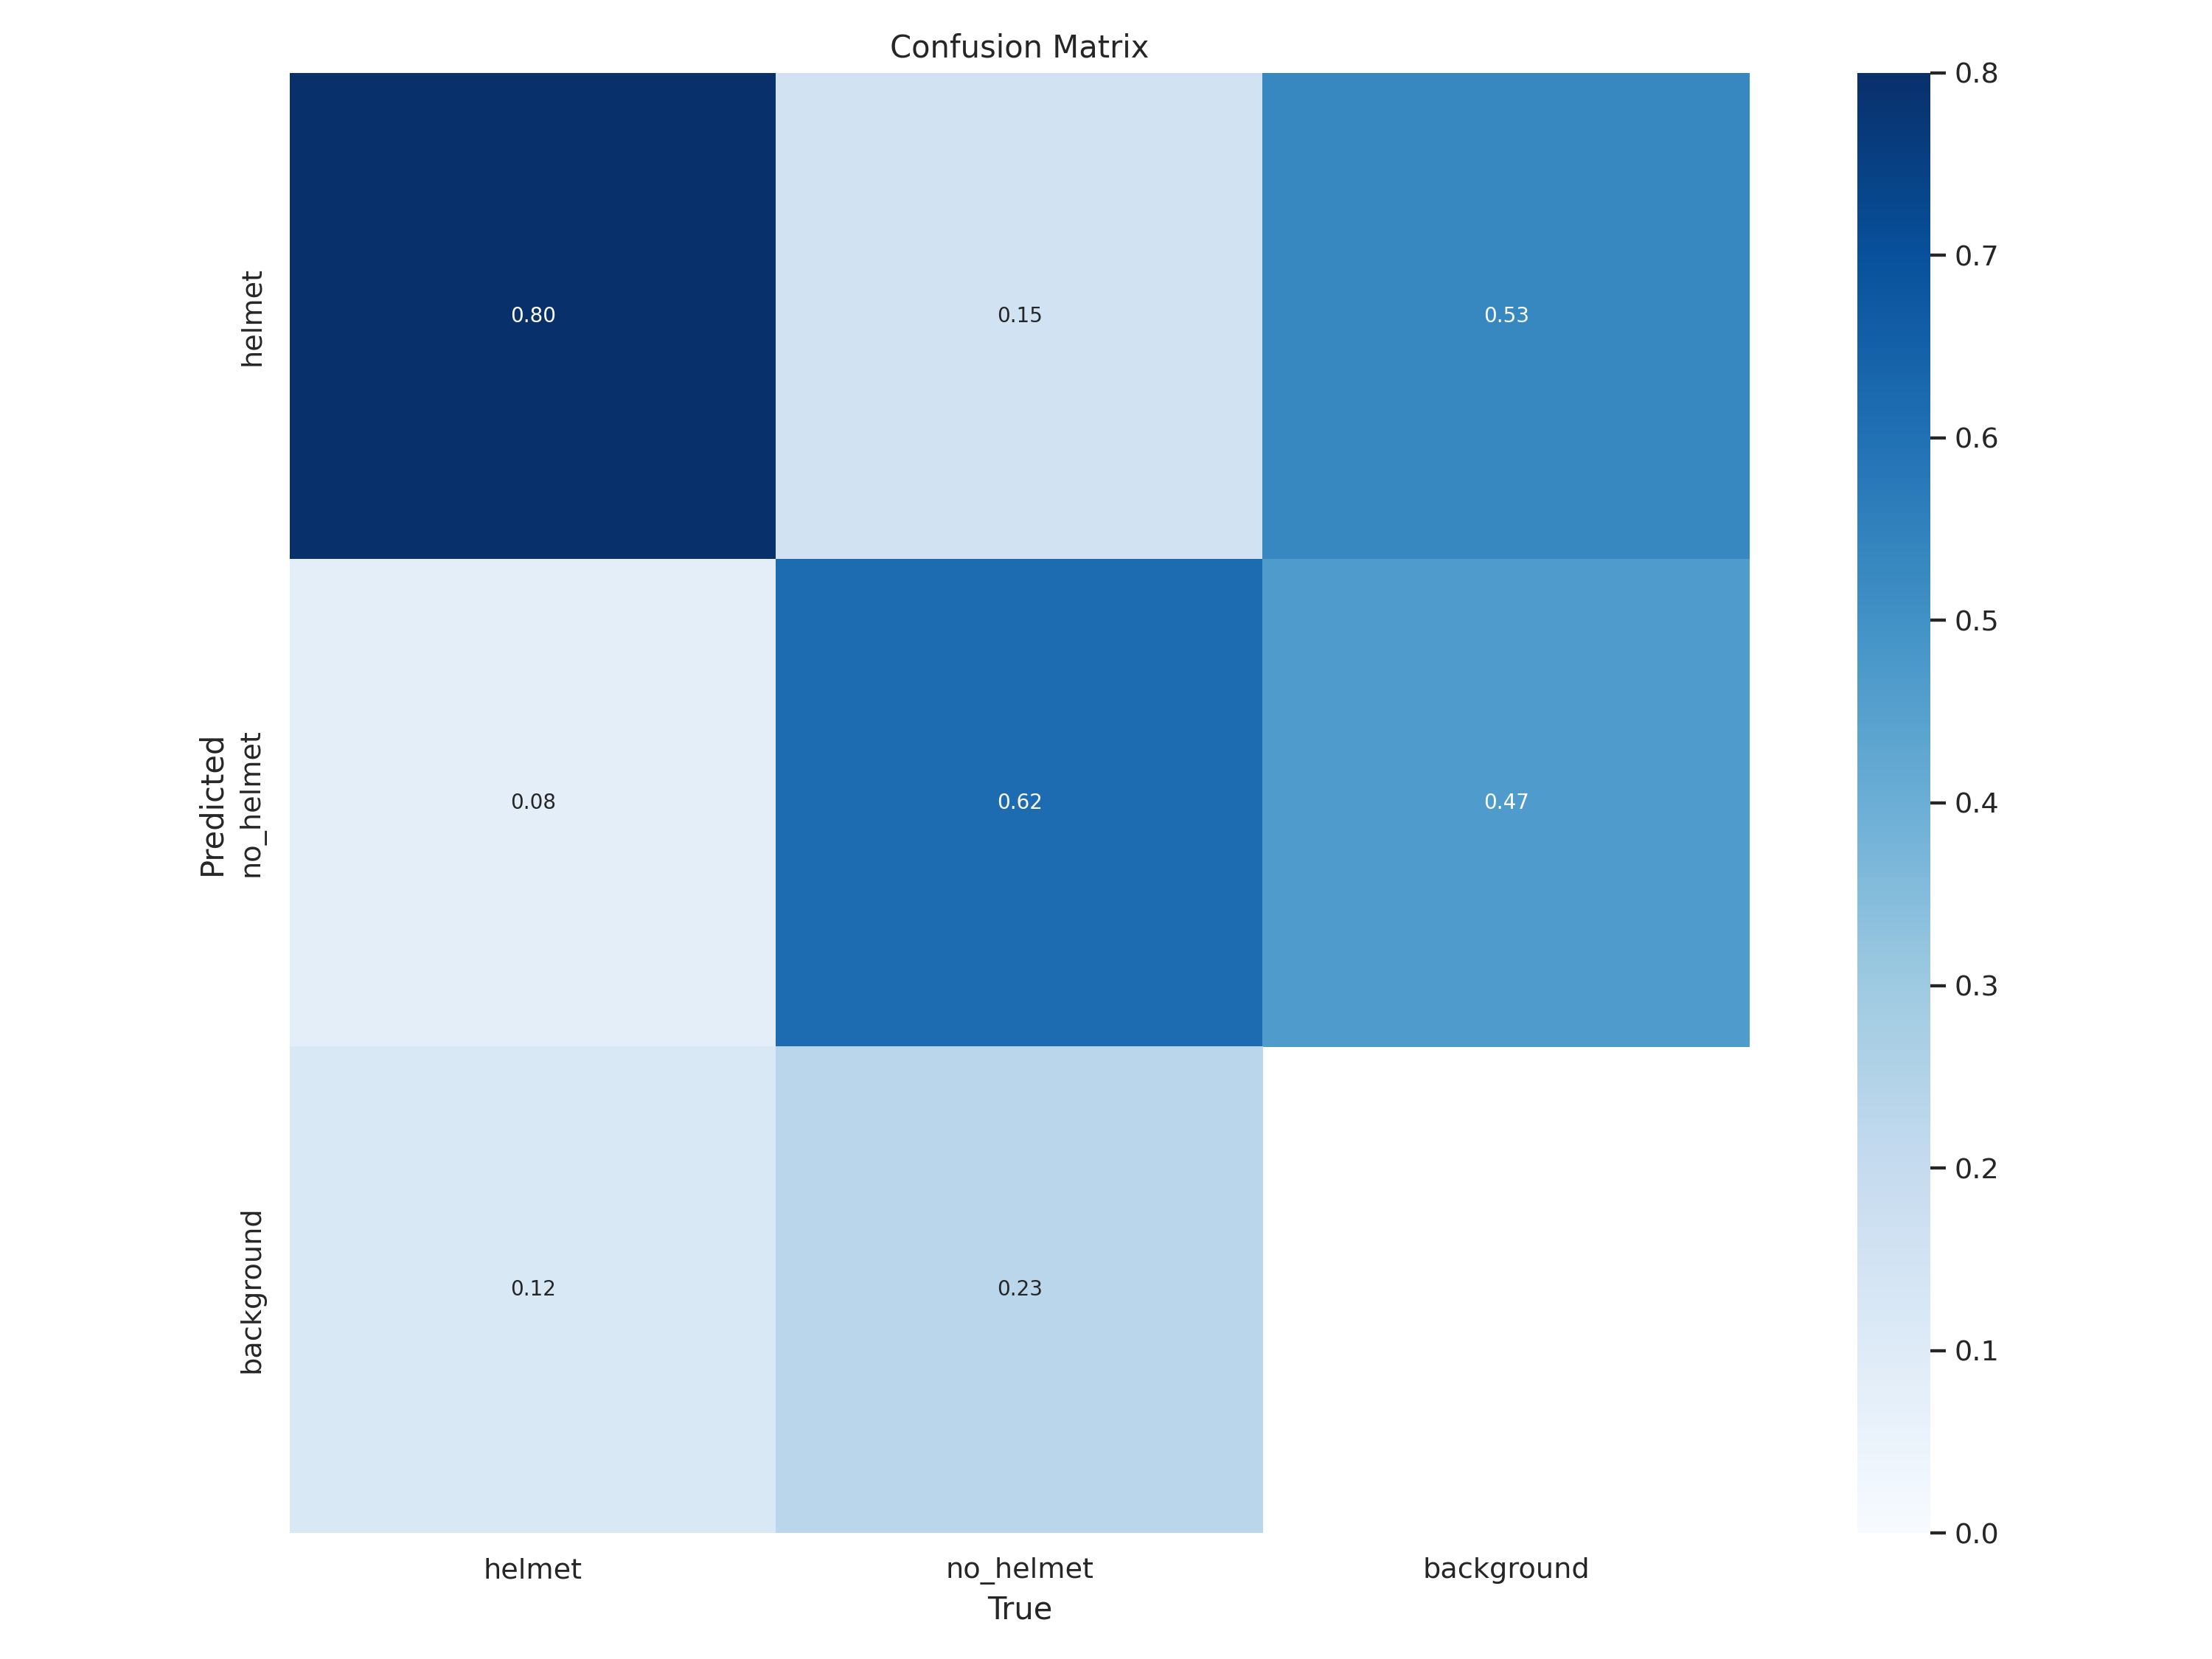

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

/content


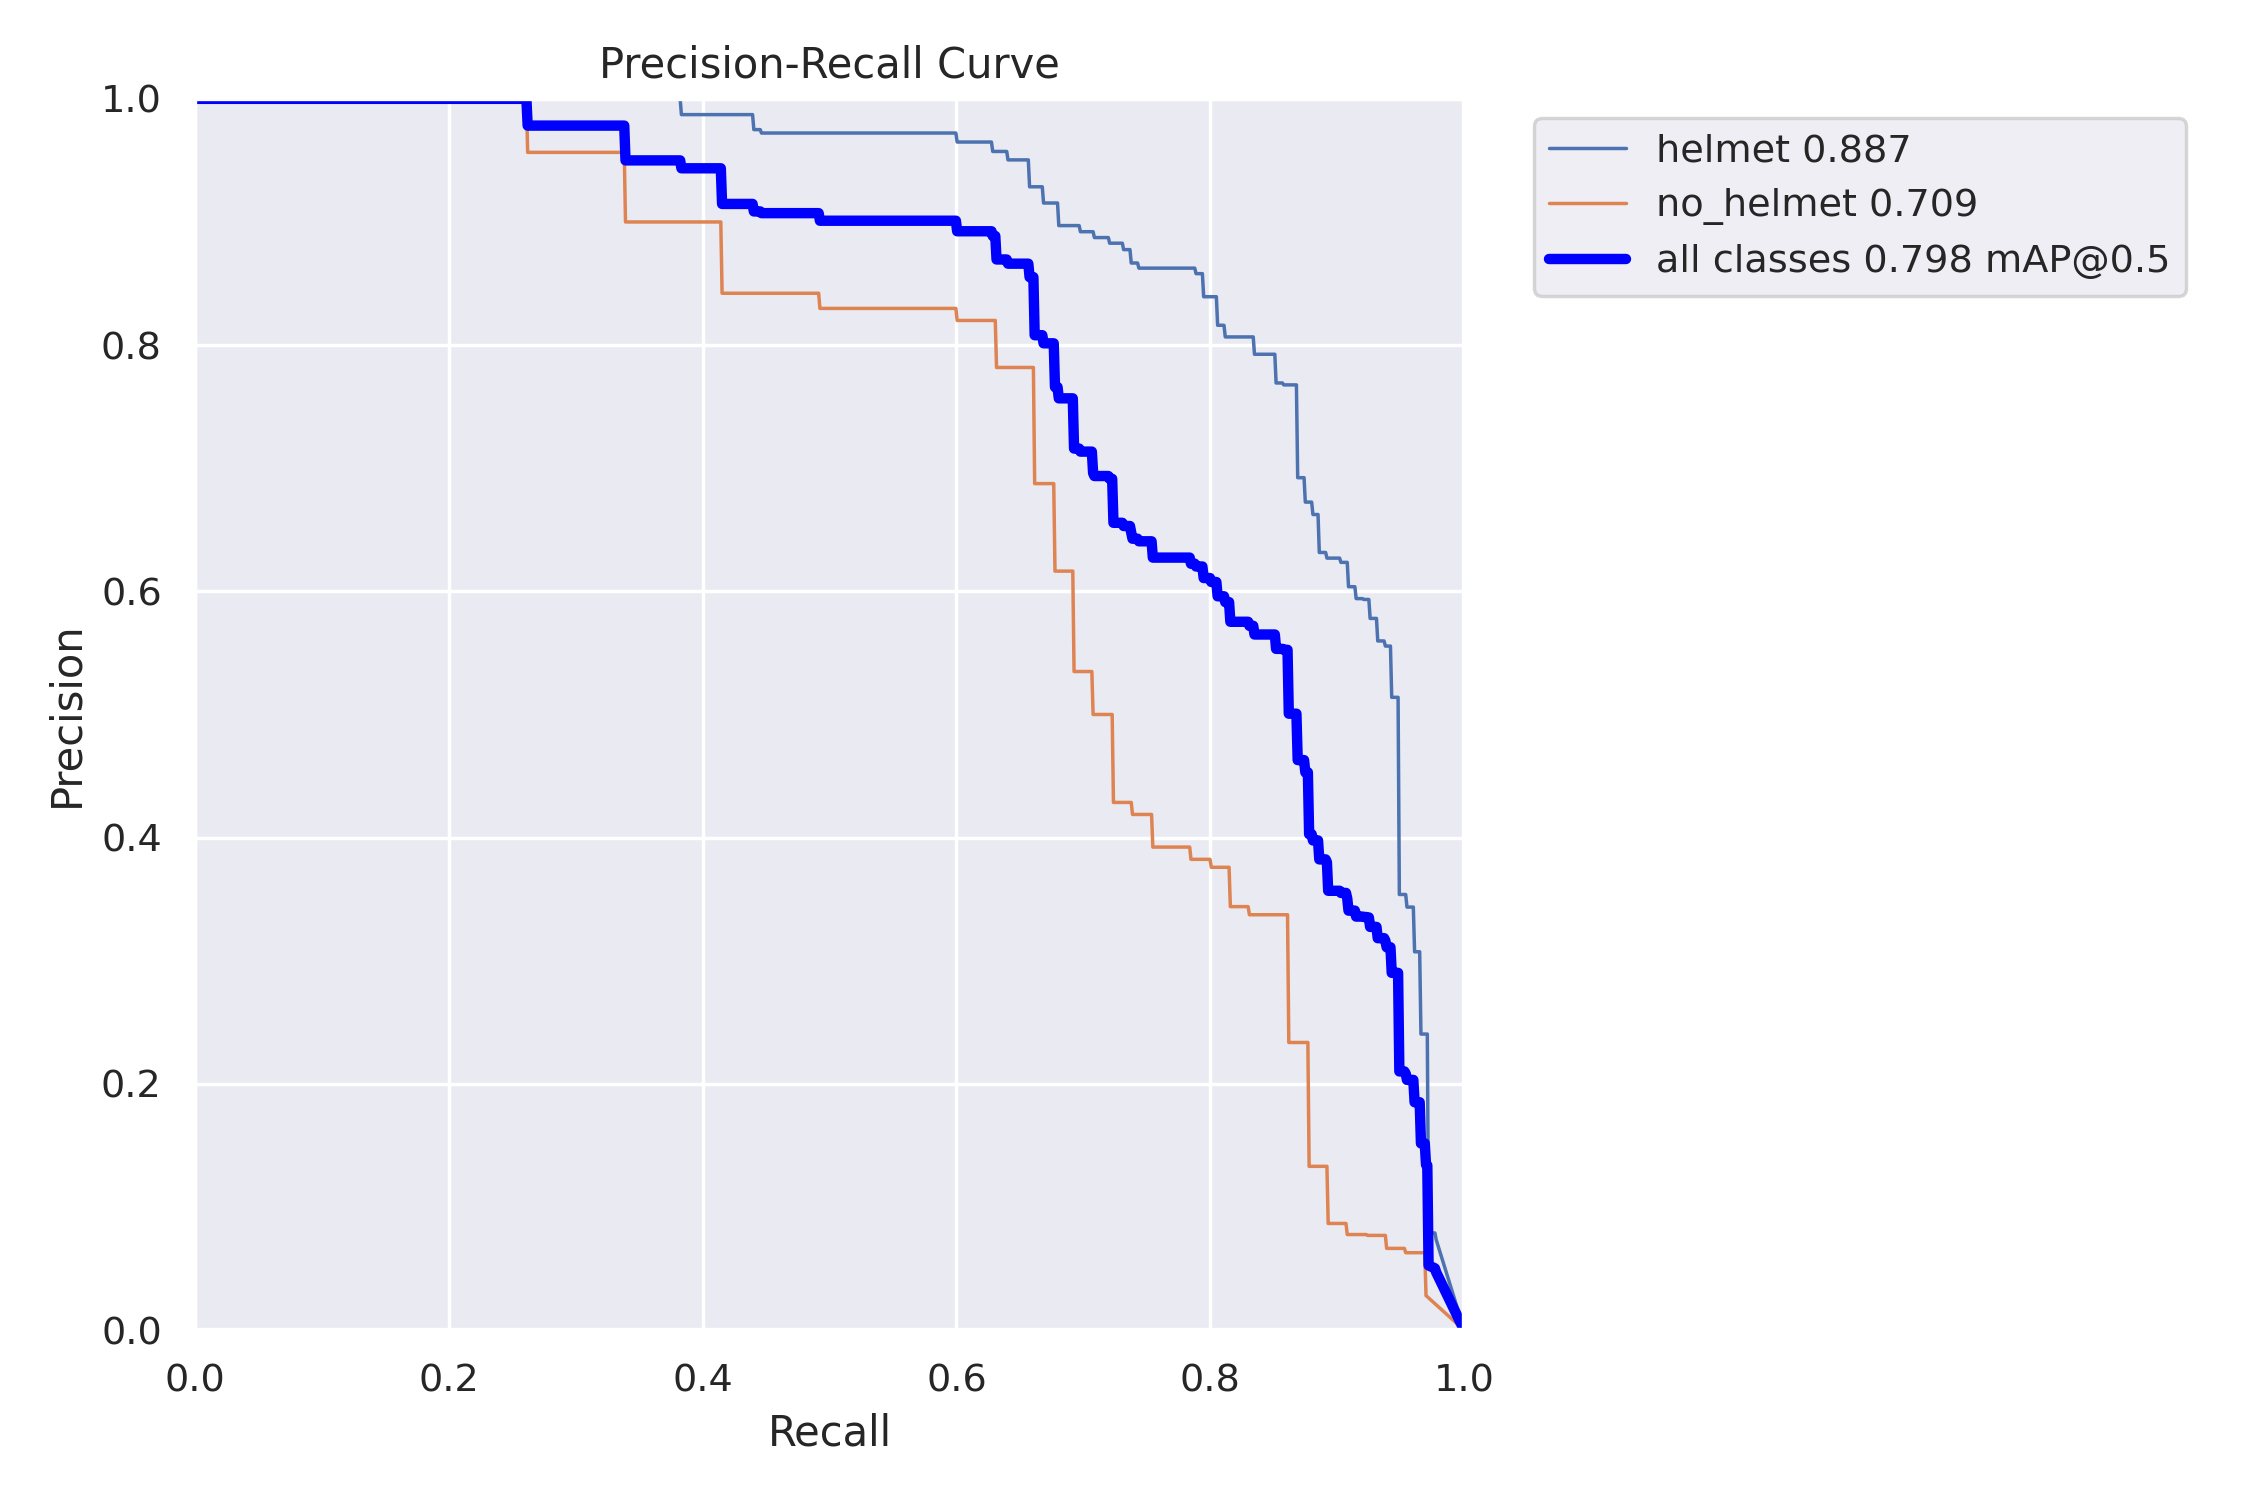

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/PR_curve.png', width=600)

/content


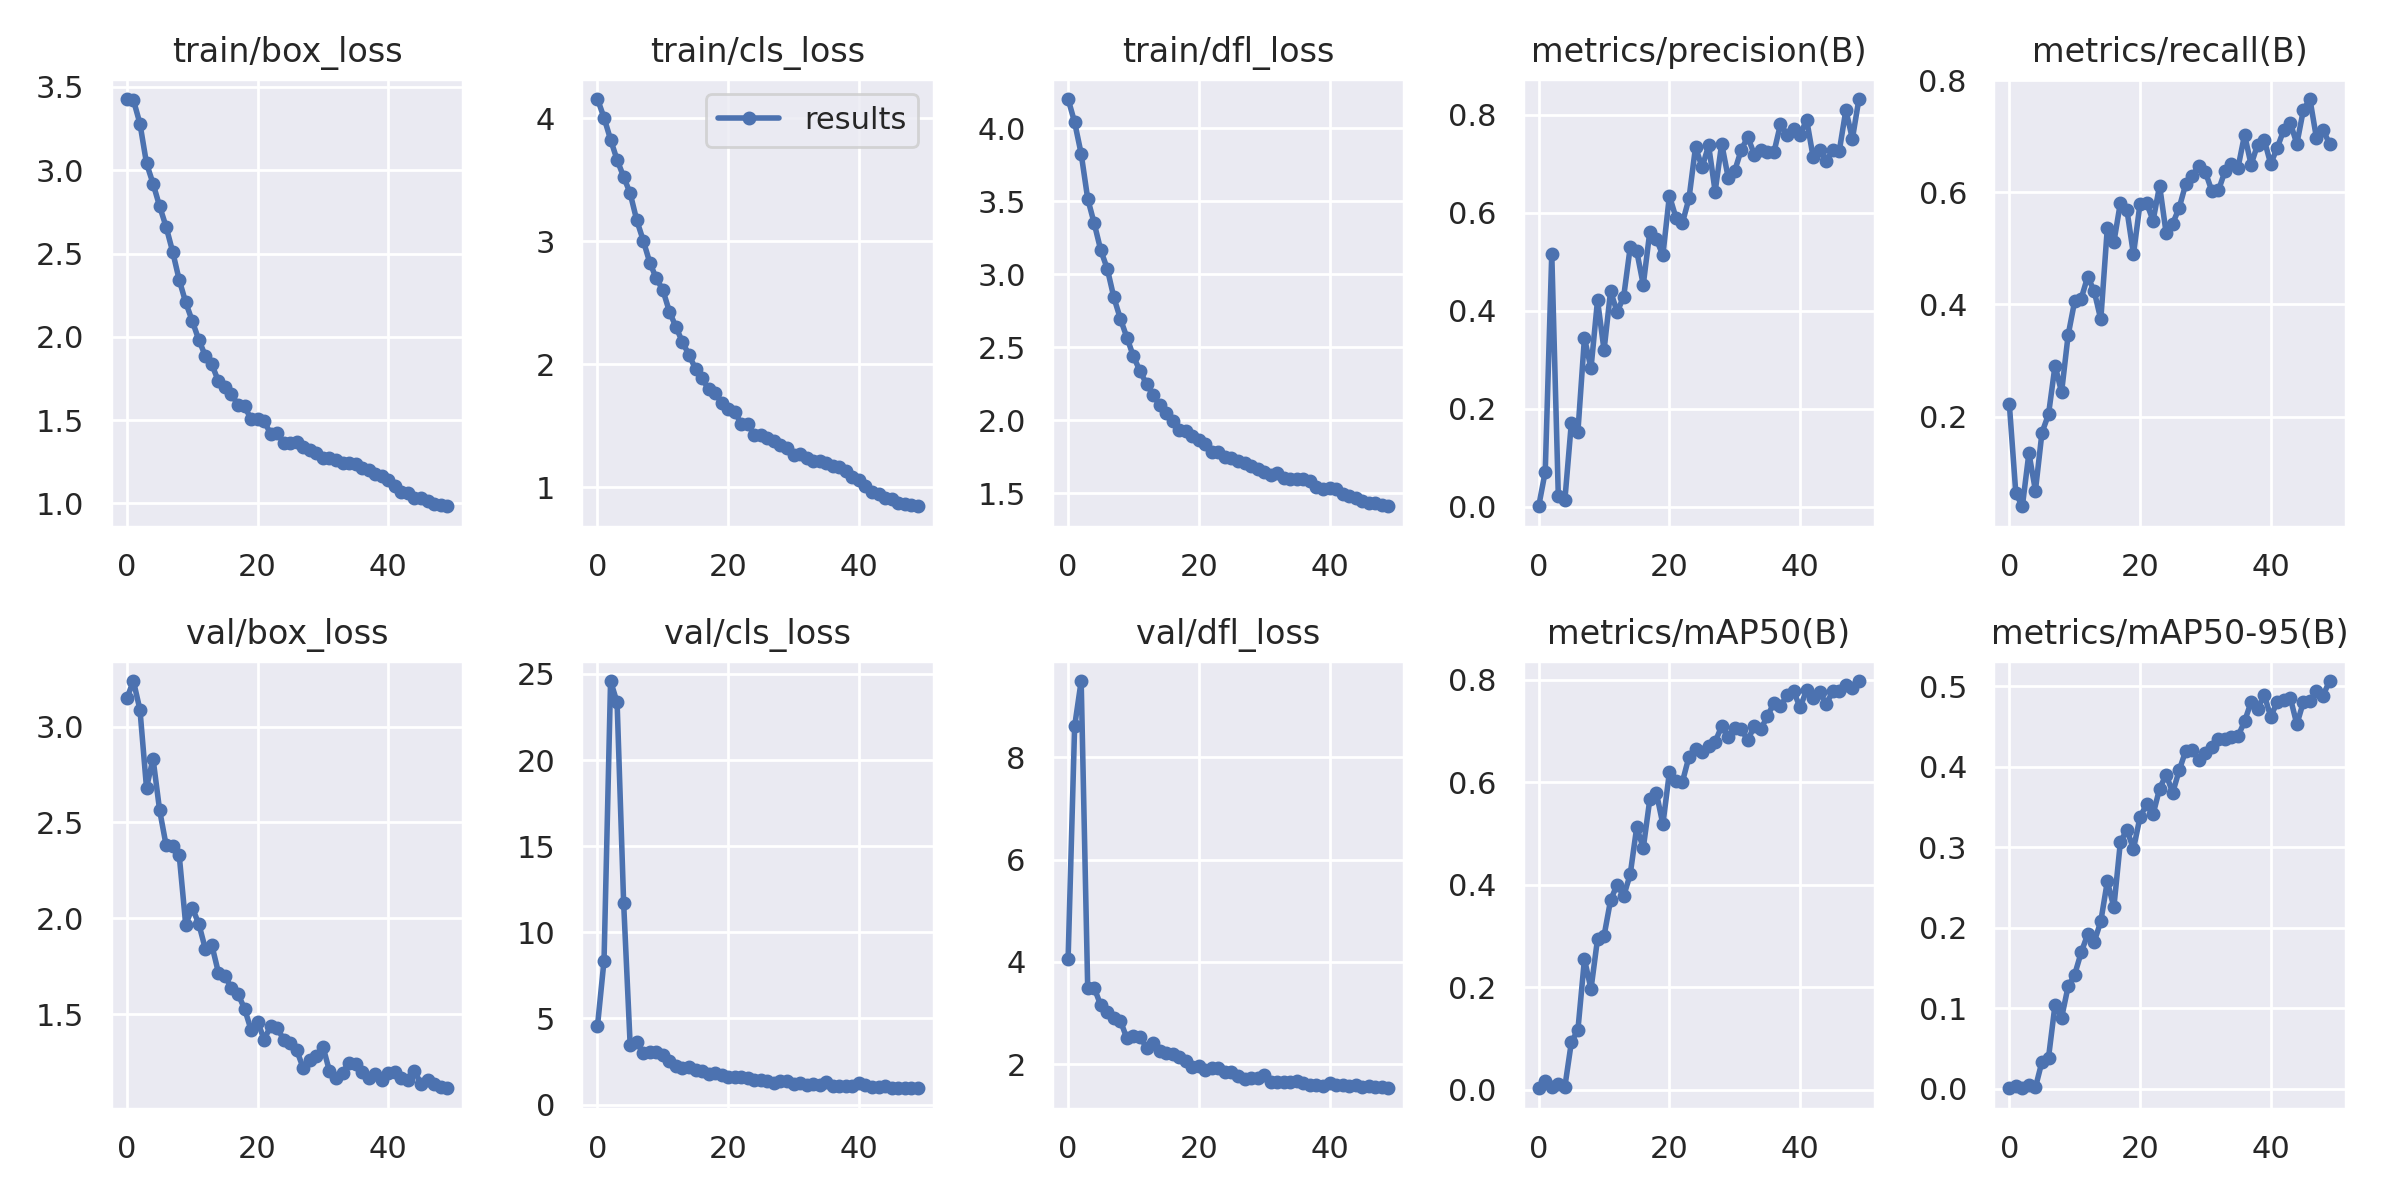

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

/content


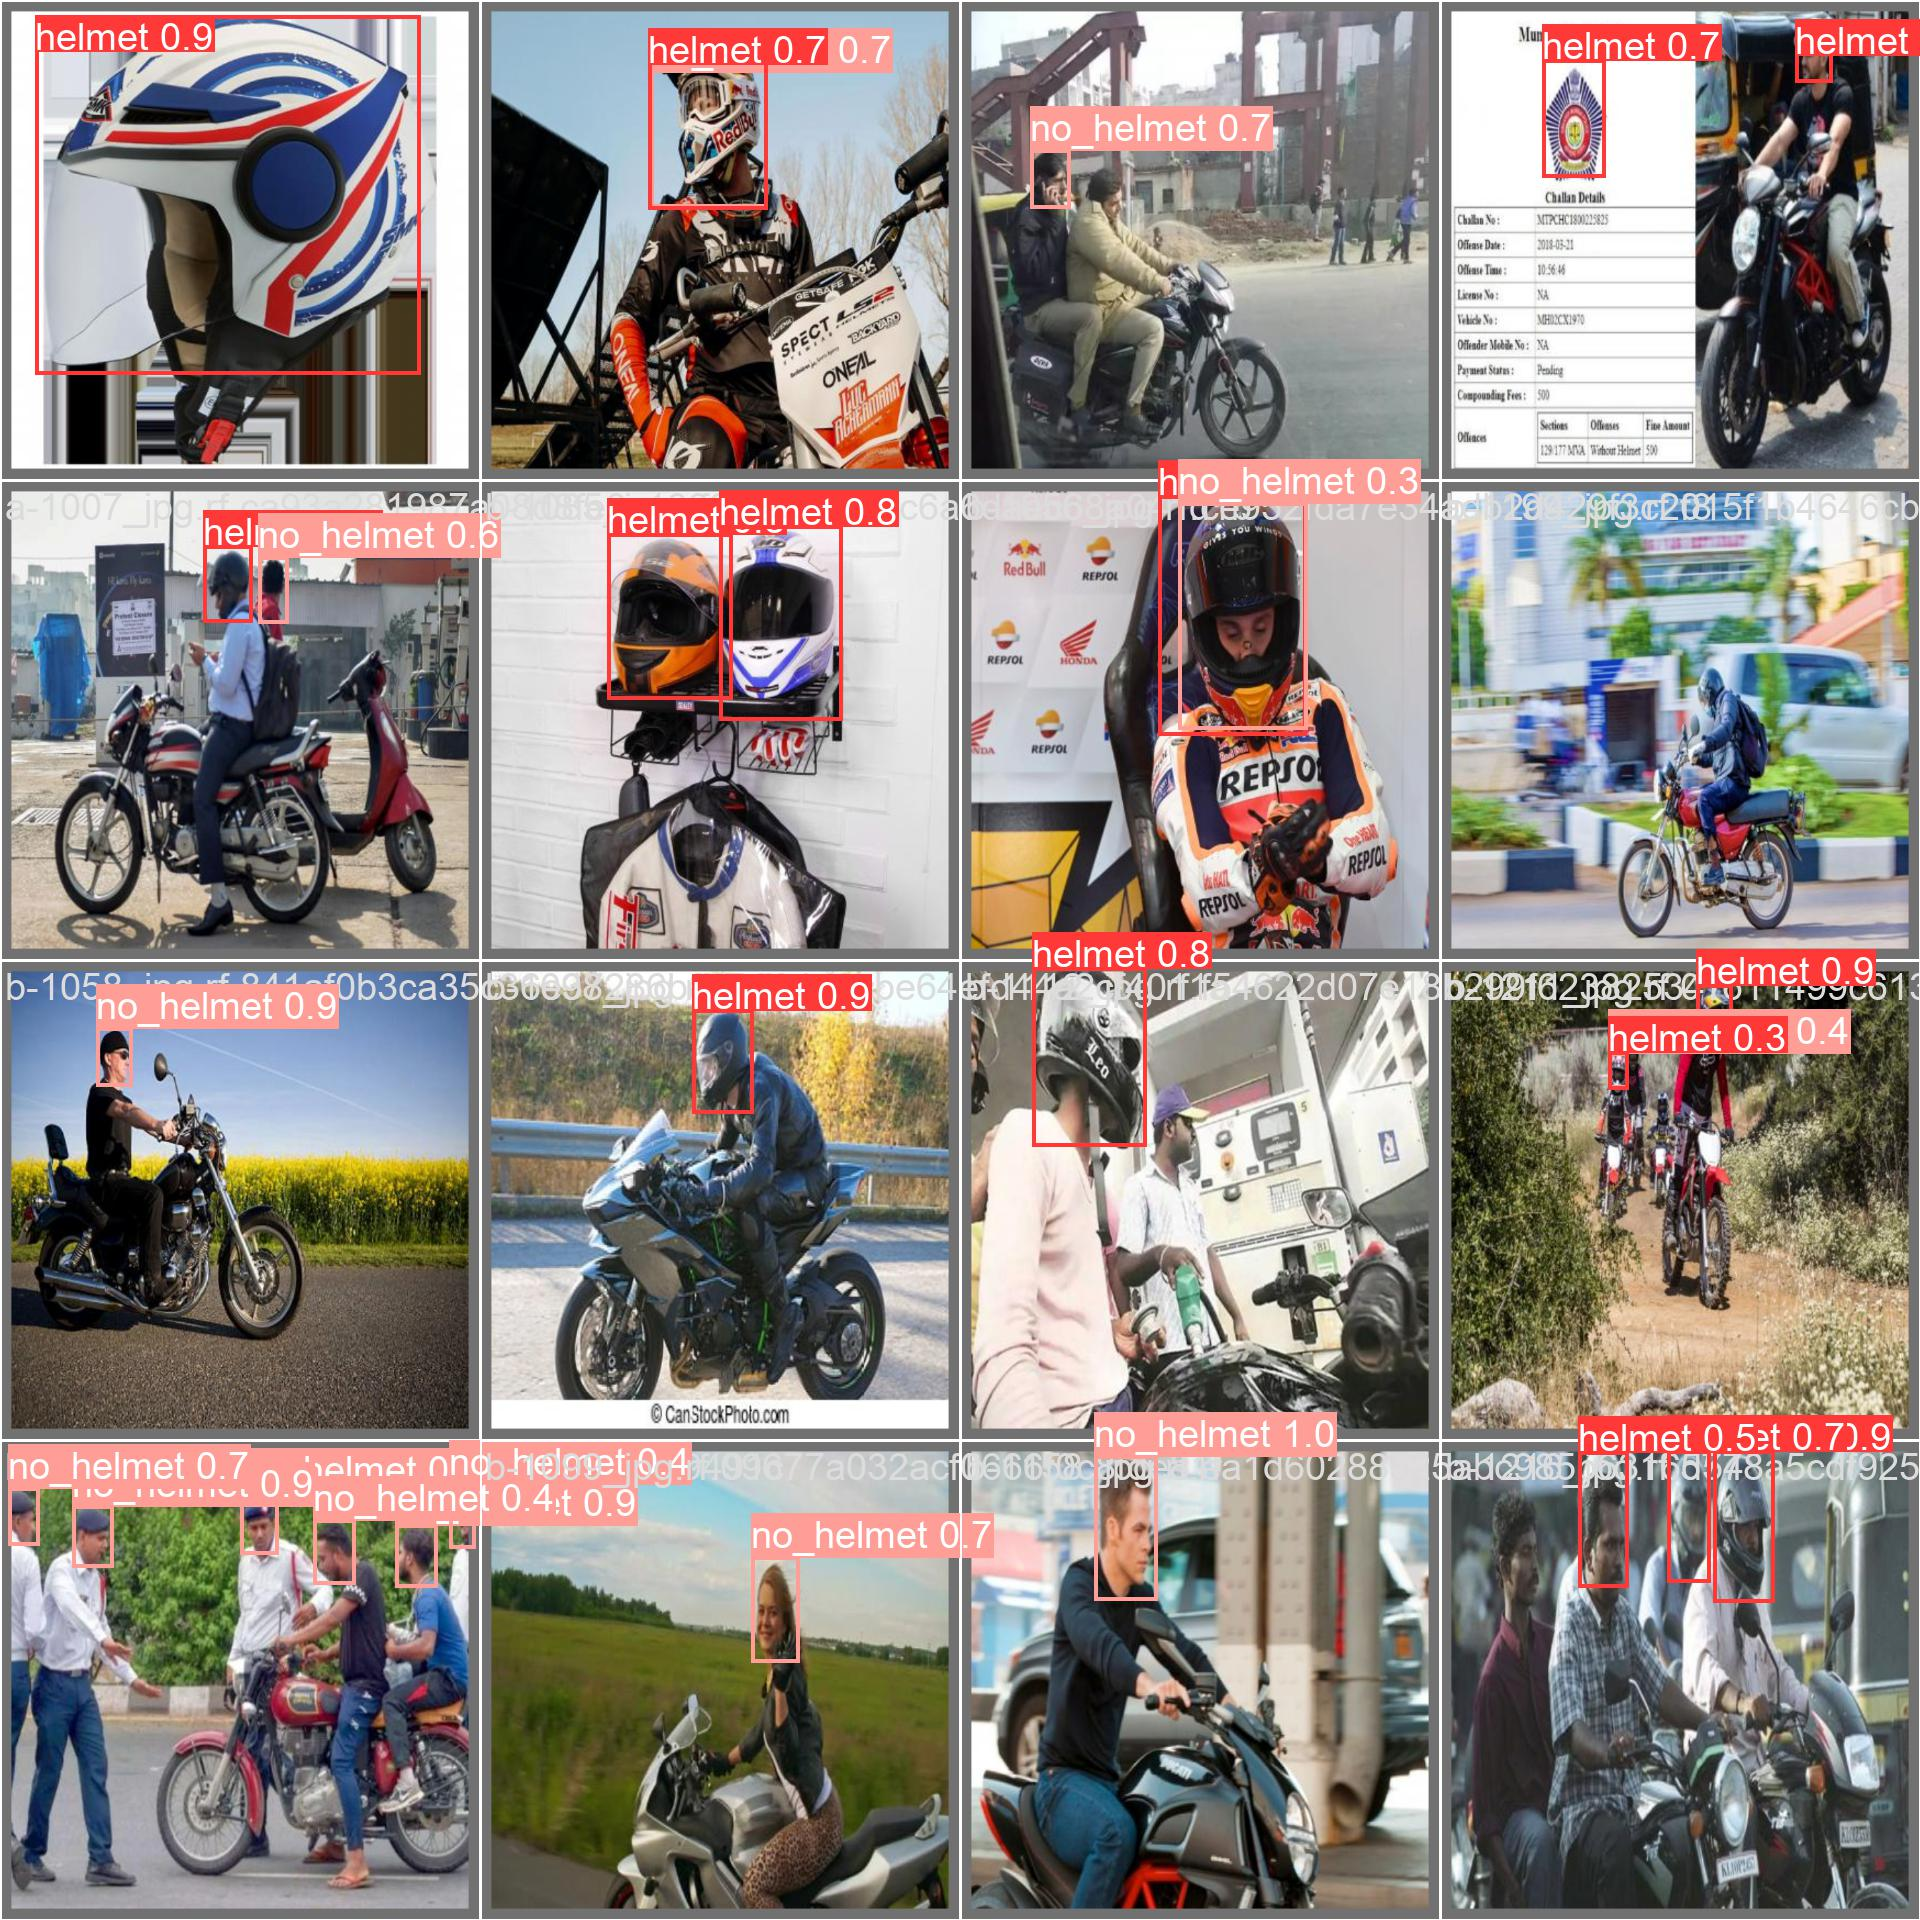

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

#VALIDATION:50 EPOCHS


In [ ]:
%cd {HOME}
!yolo task=detect mode=val model="/content/runs/detect/train3/weights/best.pt" data="/content/datasets/helmet_v3-1/data.yaml"

/content
Ultralytics YOLOv8.0.14 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/helmet_v3-1/valid/labels.cache... 162 images, 0 backgrounds, 0 corrupt: 100% 162/162 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:03<00:00,  2.93it/s]
                   all        162        240      0.832      0.687      0.798      0.506
                helmet        162        175      0.875      0.737      0.887      0.619
             no_helmet        162         65       0.79      0.636      0.709      0.393
Speed: 0.4ms pre-process, 6.3ms inference, 0.0ms loss, 2.2ms post-process per image


/content


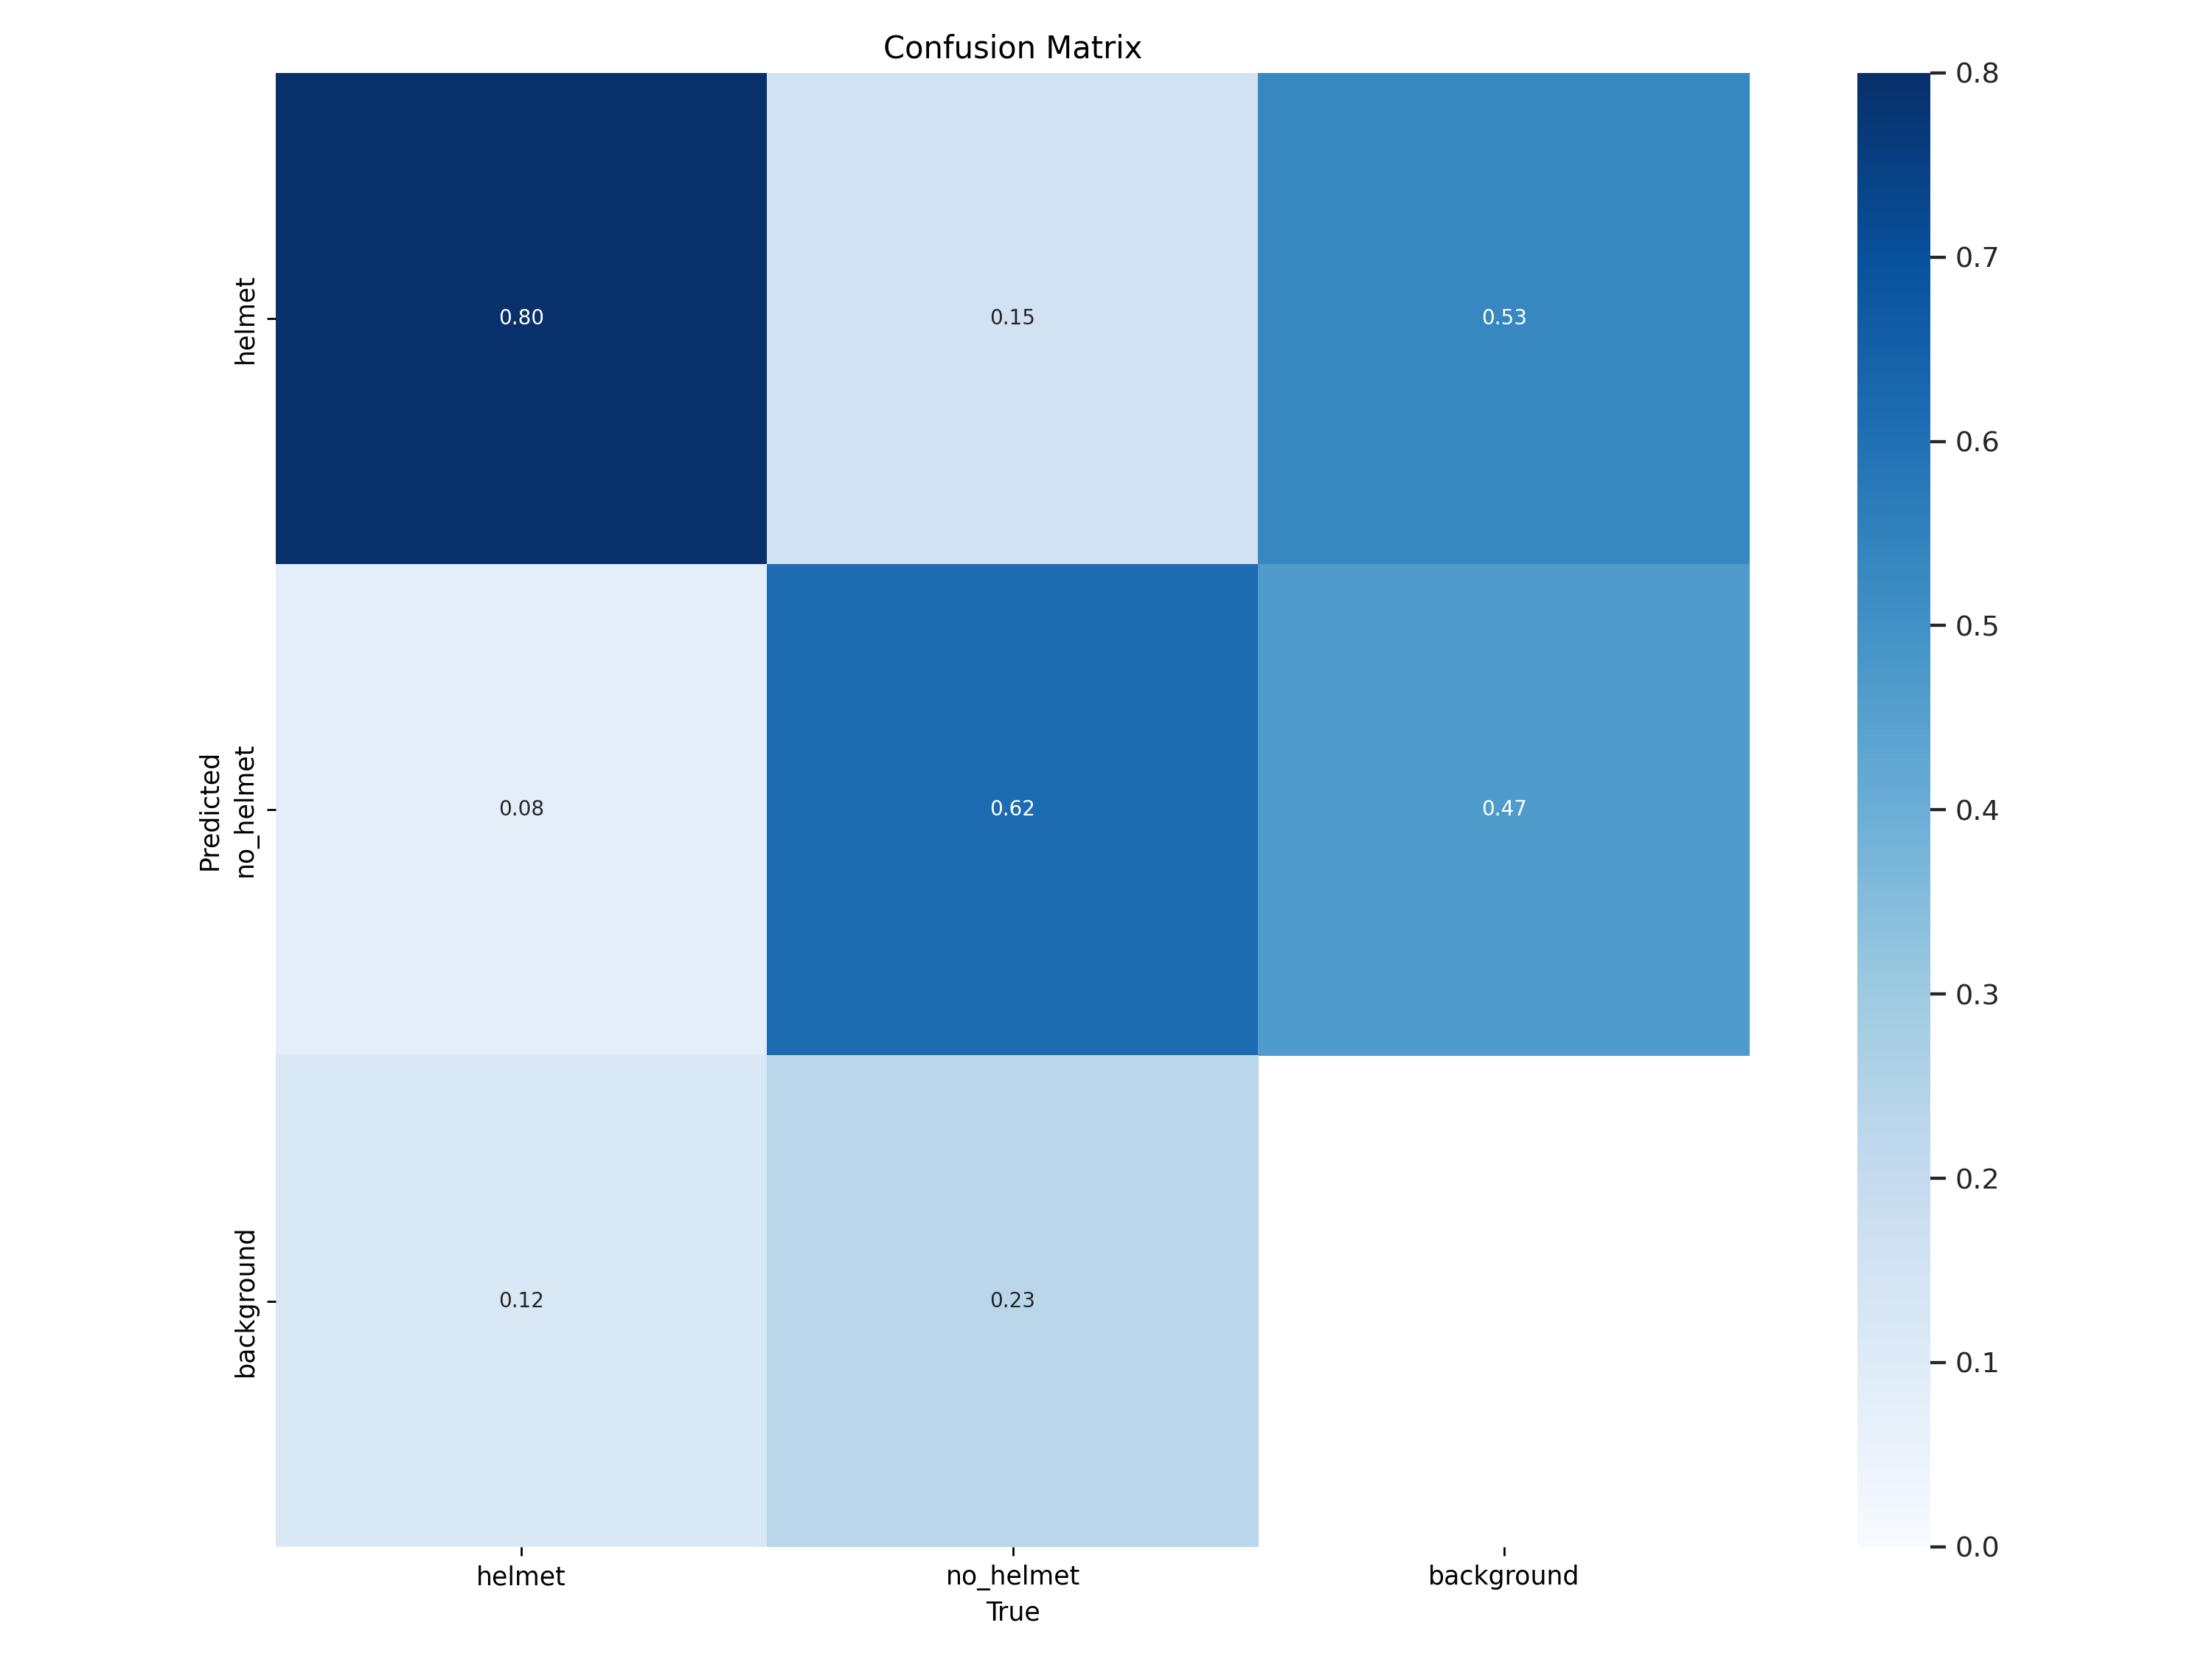

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val2/confusion_matrix.png', width=600)

/content


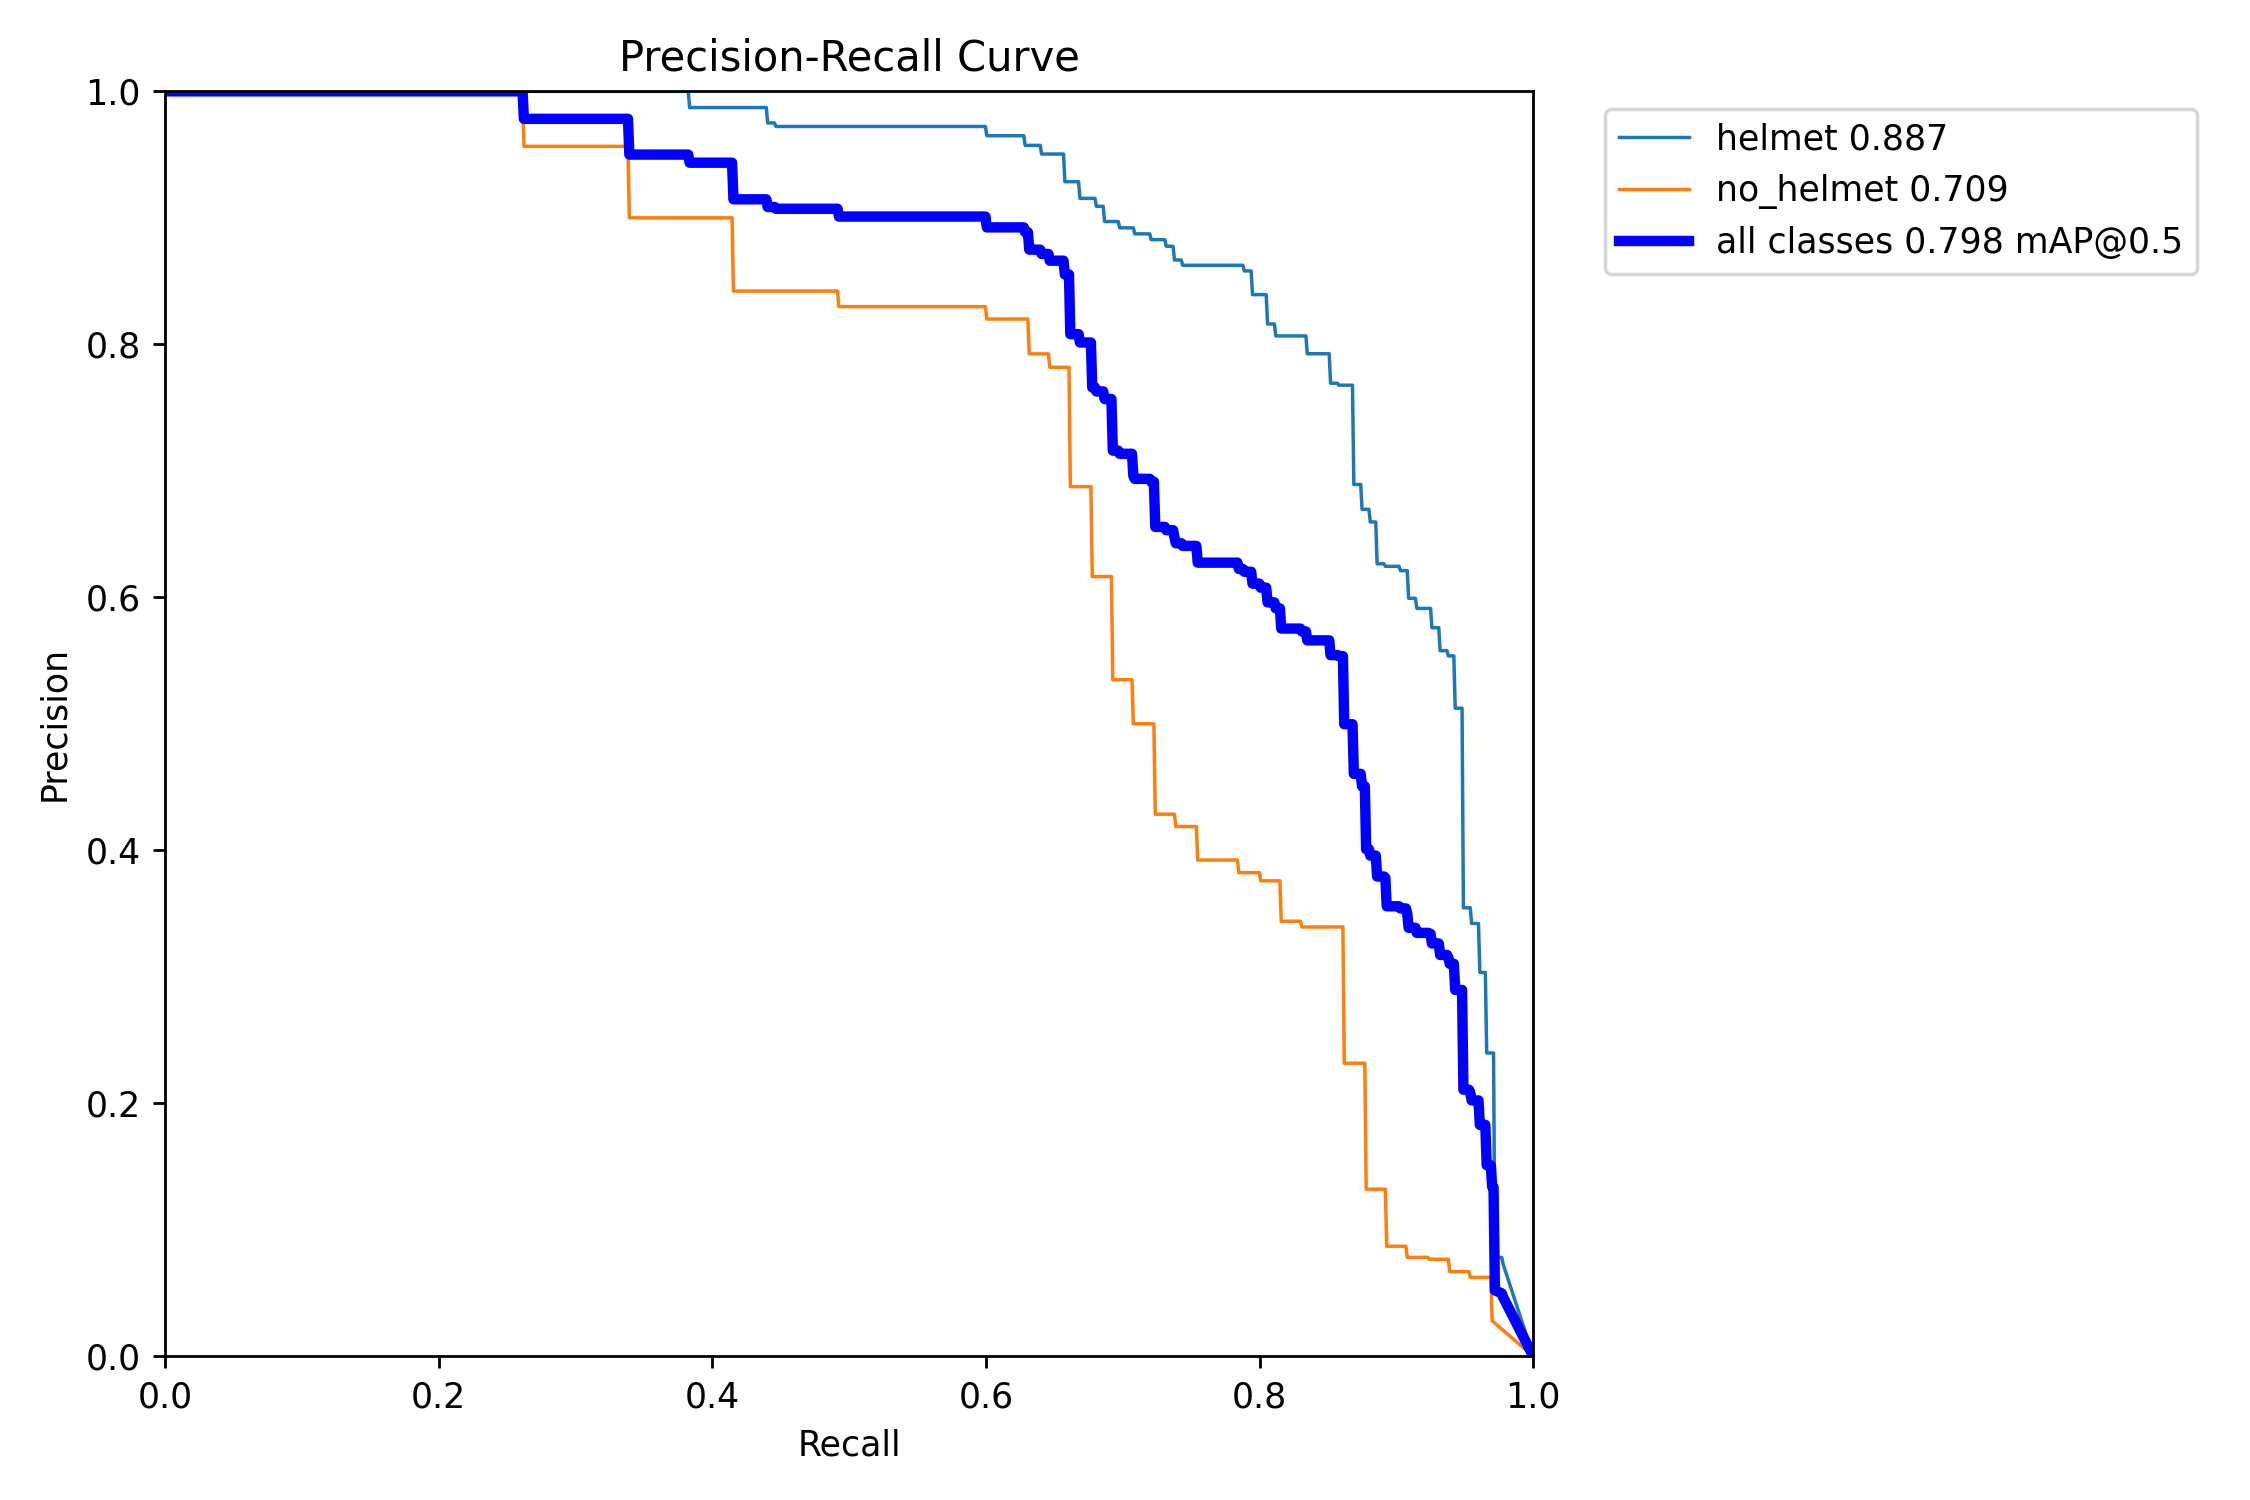

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val2/PR_curve.png', width=600)

#PREDICTION: 50 EPOCHS


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.14 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
image 1/79 /content/datasets/helmet_v3-1/test/images/a-1004_jpg.rf.e8c5e48c8ccecb5a4f6ef22093657663.jpg: 640x640 1 helmet, 9.6ms
image 2/79 /content/datasets/helmet_v3-1/test/images/a-1005_jpg.rf.aaedbf736dc56ff298f9598b776dd475.jpg: 640x640 1 helmet, 9.8ms
image 3/79 /content/datasets/helmet_v3-1/test/images/a-1020_jpg.rf.d5166db4d6aebe32be0d95d9bbf117fa.jpg: 640x640 2 helmets, 9.5ms
image 4/79 /content/datasets/helmet_v3-1/test/images/a-1050_jpg.rf.3f6d0bc1b666c130f8962bb4eba3e5bc.jpg: 640x640 1 helmet, 9.2ms
image 5/79 /content/datasets/helmet_v3-1/test/images/a-1069_jpg.rf.fd4a4a8e8dde0688972167559dea5d99.jpg: 640x640 2 helmets, 9.4ms
image 6/79 /content/datasets/helmet_v3-1/test/images/a-1085_jpg.rf.b318b9f2985b4532e6982e3c1699a9c5.jpg: 640x640 1 helmet, 9.3ms
image 7/79 /content/datasets/helmet_v3-1/test/i

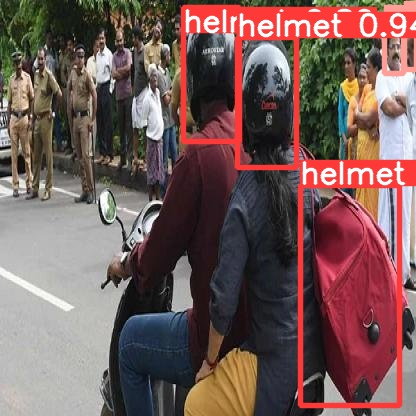

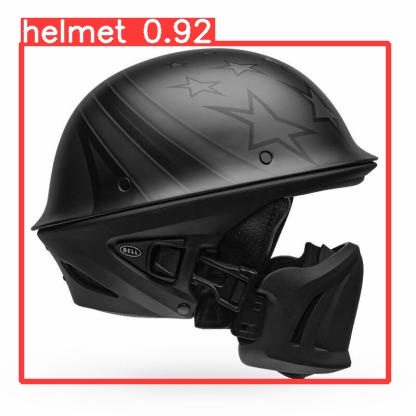

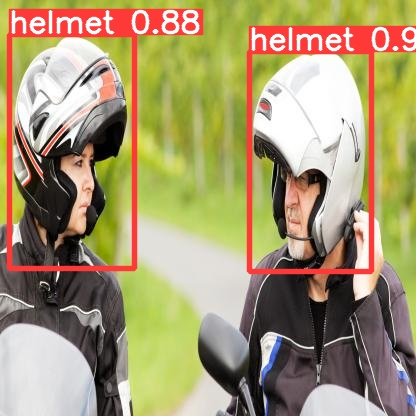

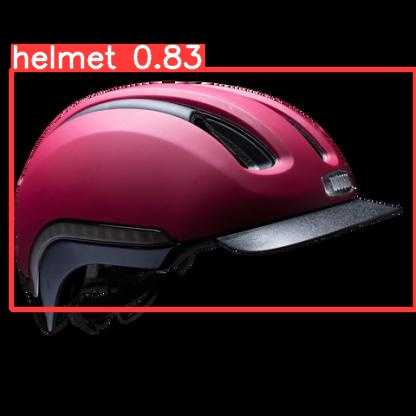

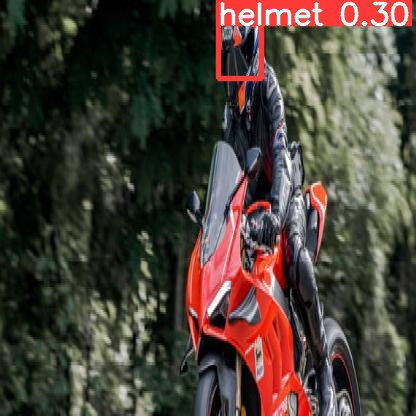

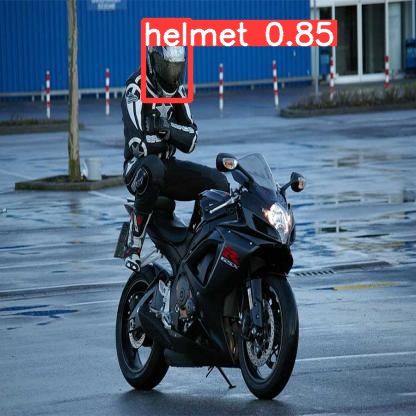

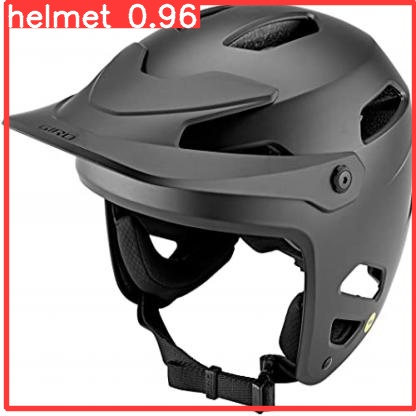

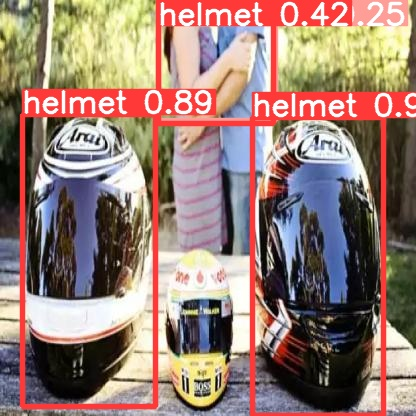

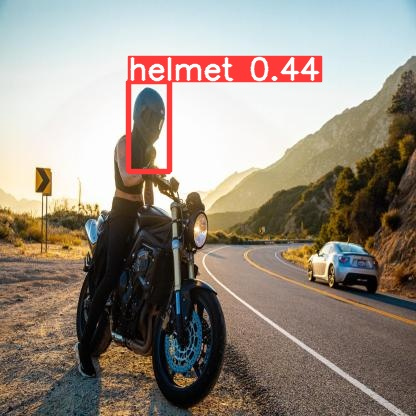

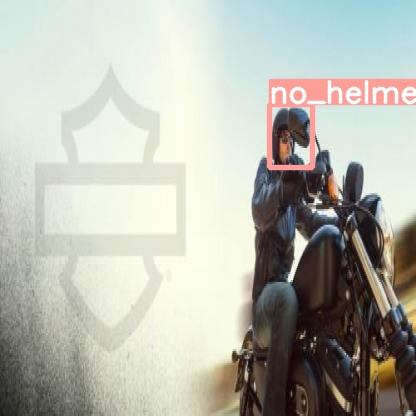

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

#MODEL TRAINING 100 EPOCHS


In [ ]:
%cd {HOME}

from ultralytics import YOLO

model= YOLO()

model.train(data='/content/datasets/helmet_v3-1/data.yaml', epochs=100)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

/content


YOLOv8n summary: 225 layers, 3157200 parameters, 3157184 gradients, 8.9 GFLOPs

Ultralytics YOLOv8.0.14 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, data=/content/datasets/helmet_v3-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, classes=None, format=torchscript, keras=False, 

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.yaml data={dataset.location}/data.yaml epochs=100 imgsz=416

/content

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv             

#MODEL RESULTS: 100 EPOCHS

/content


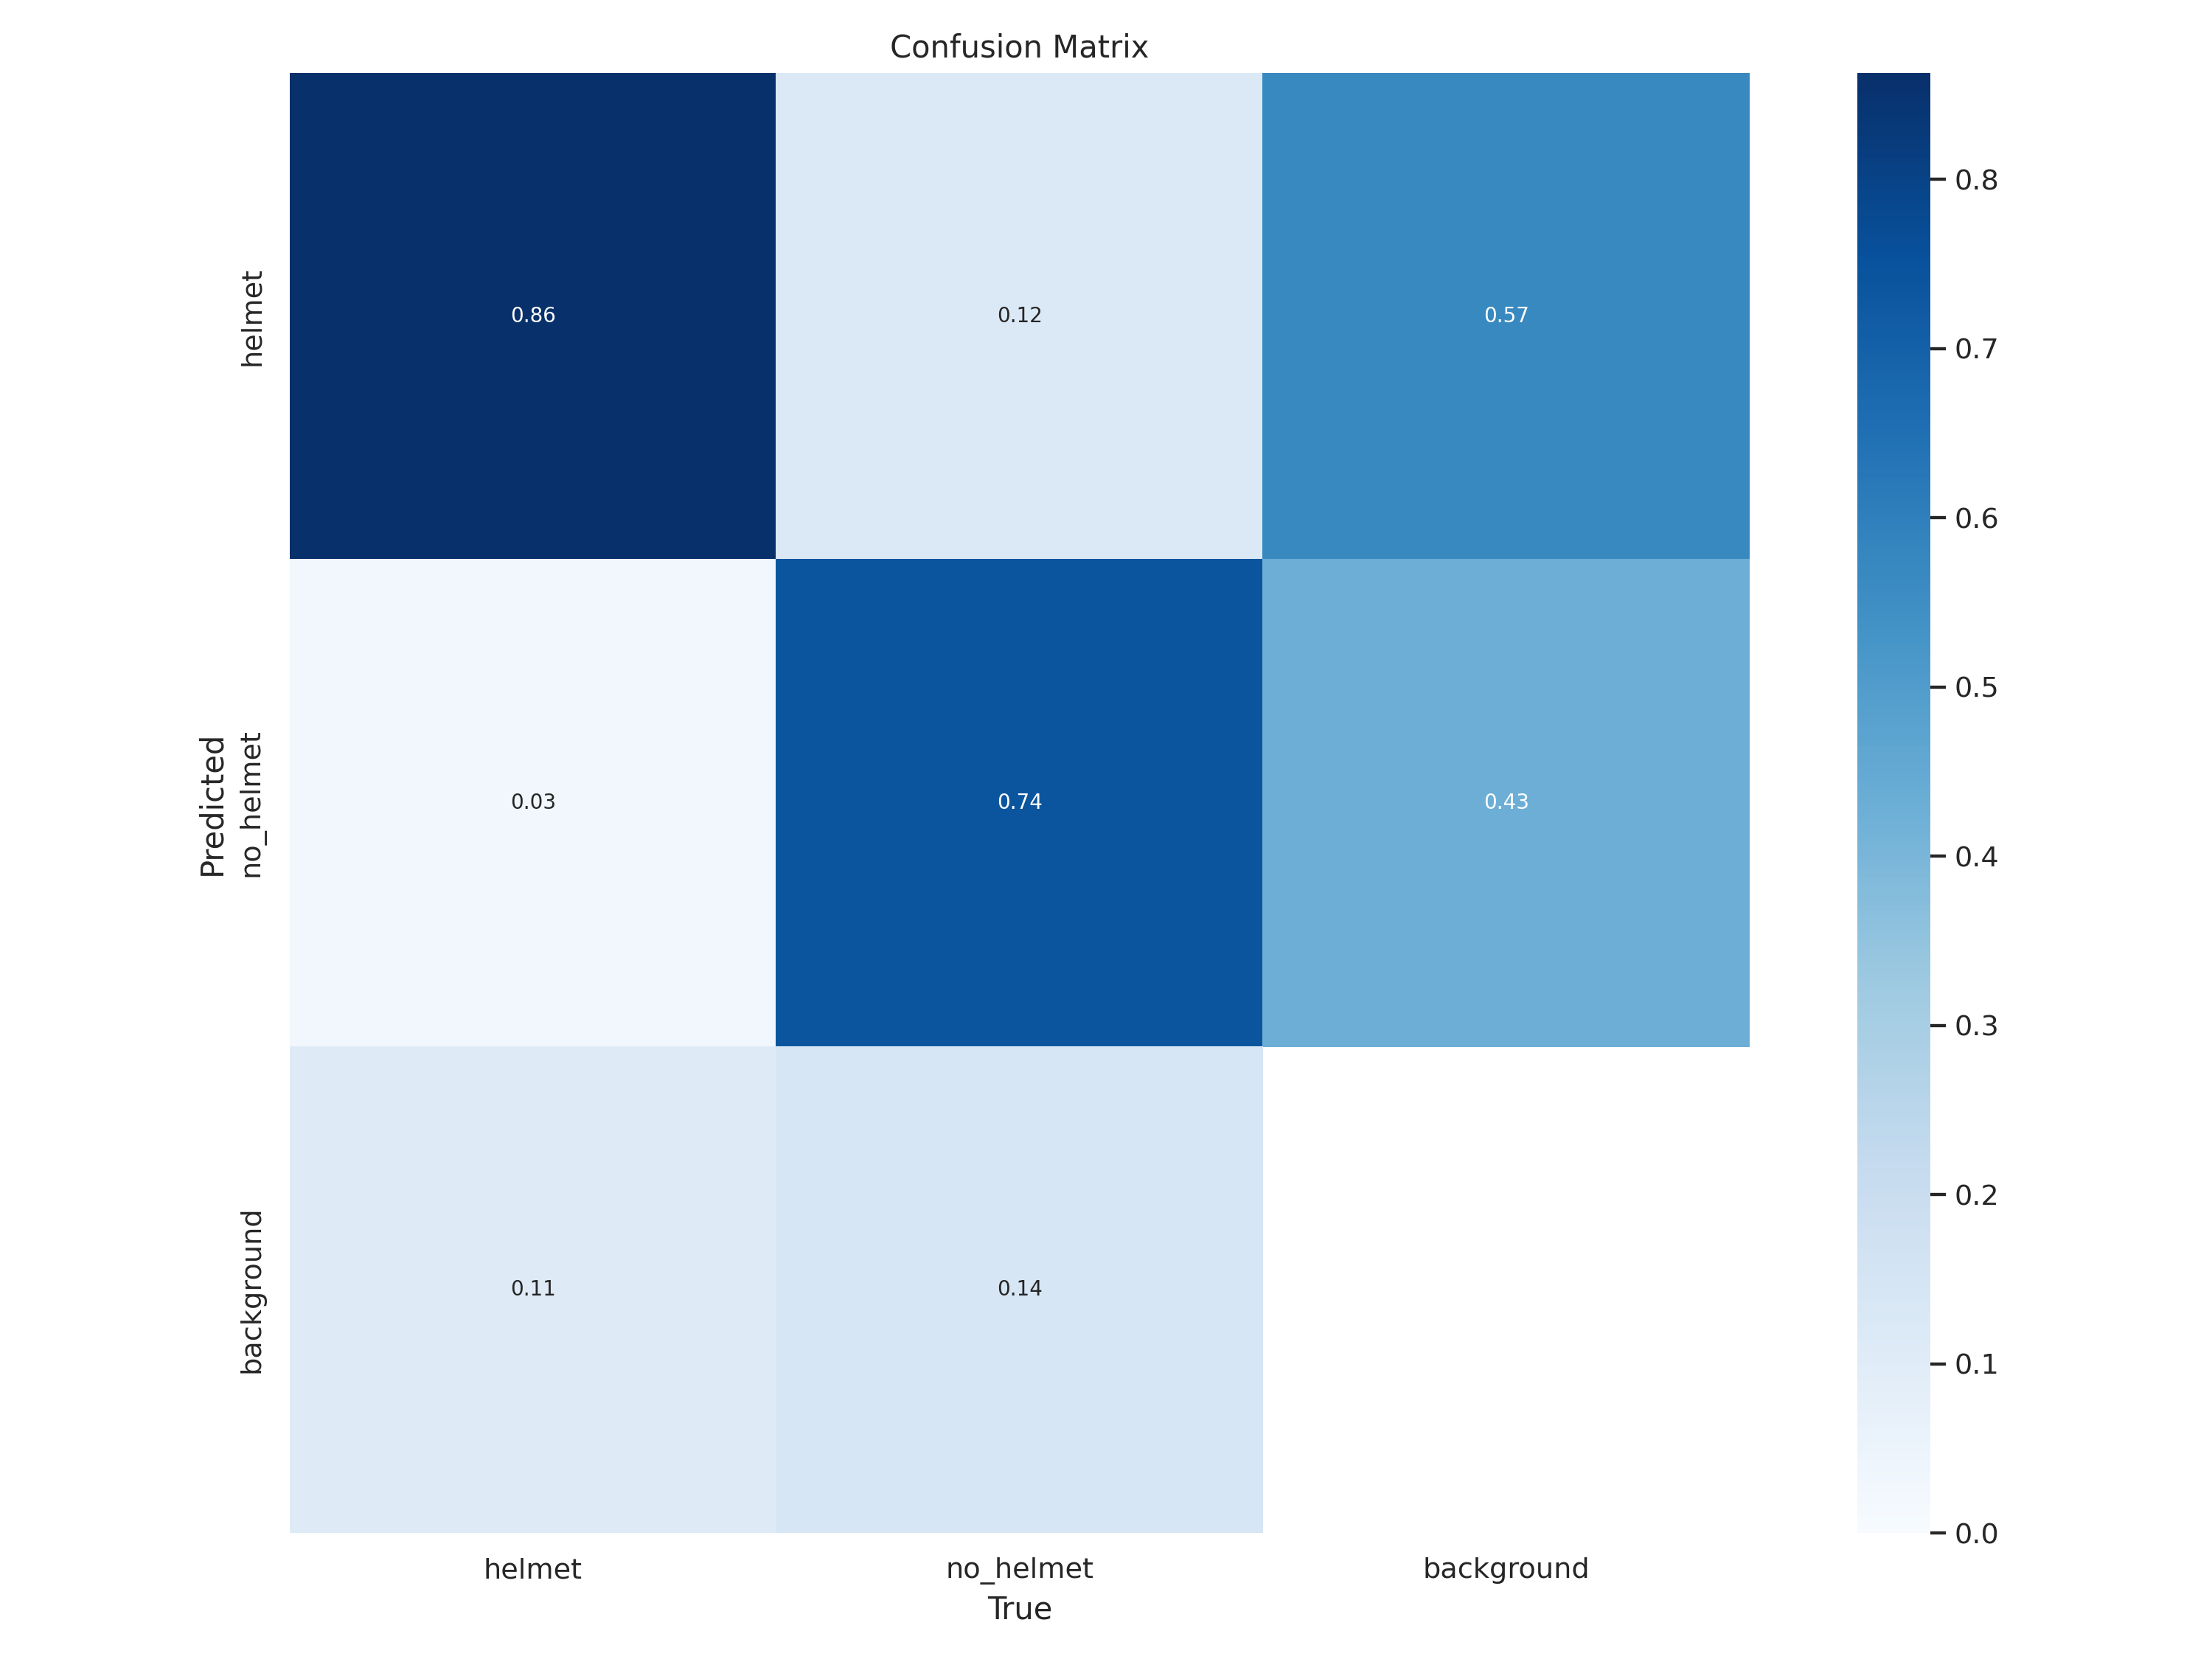

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/confusion_matrix.png', width=600)

/content


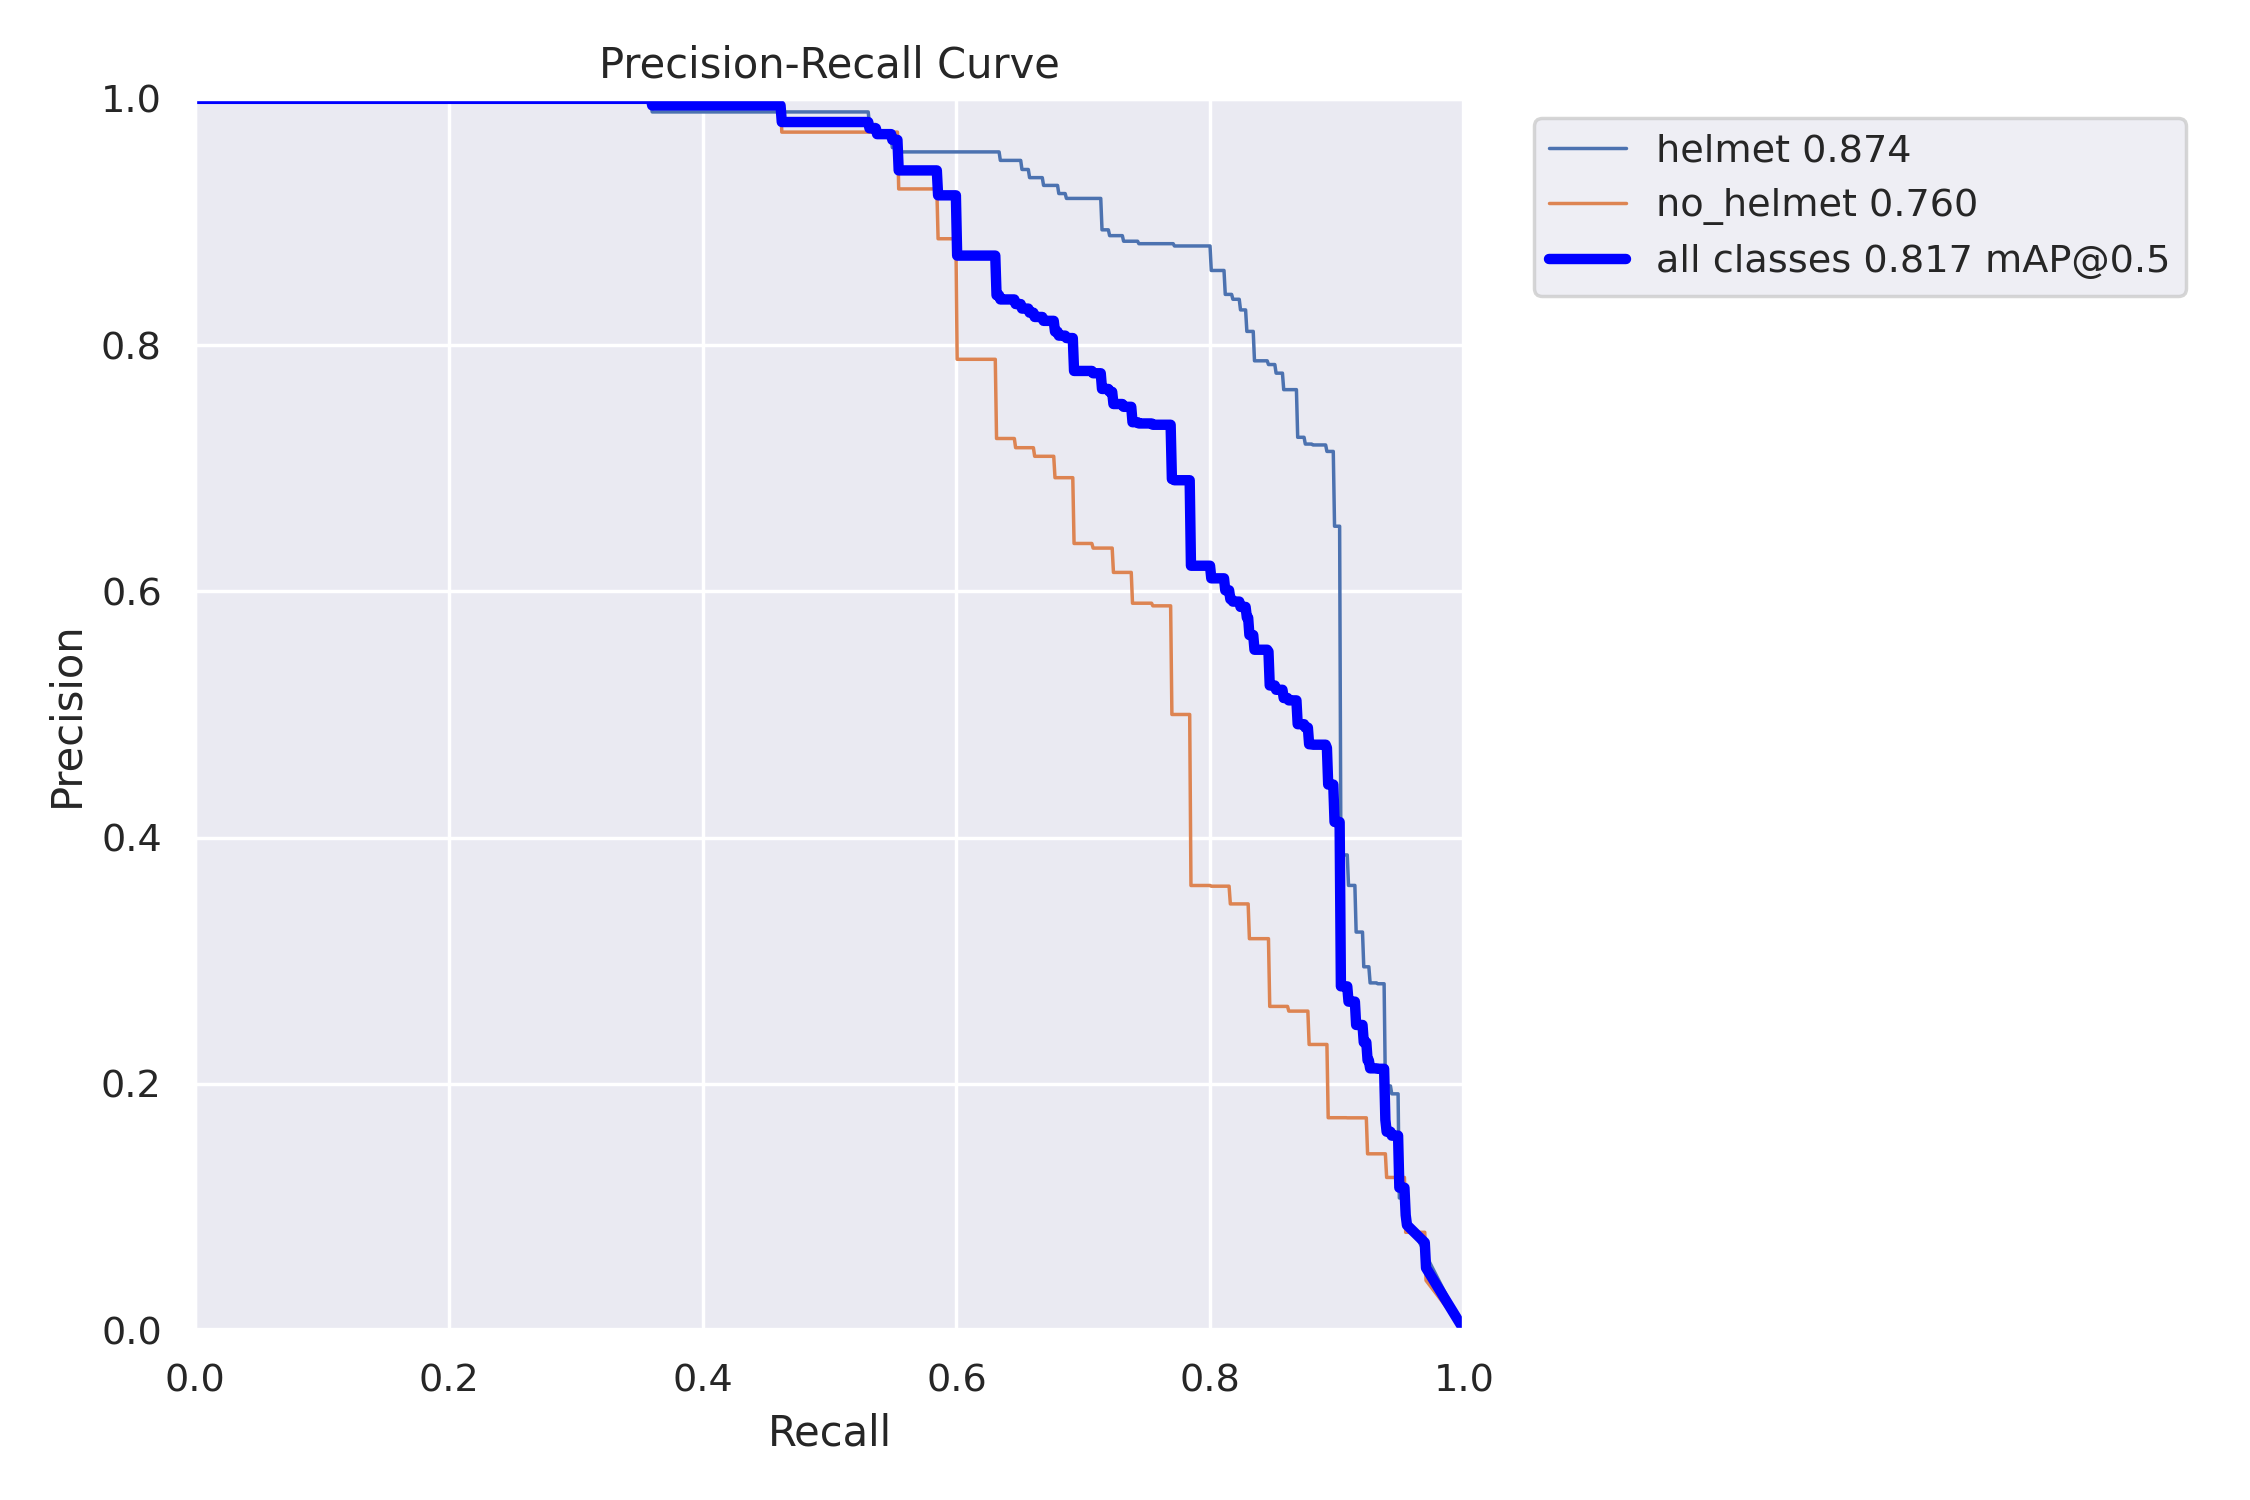

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/PR_curve.png', width=600)

/content


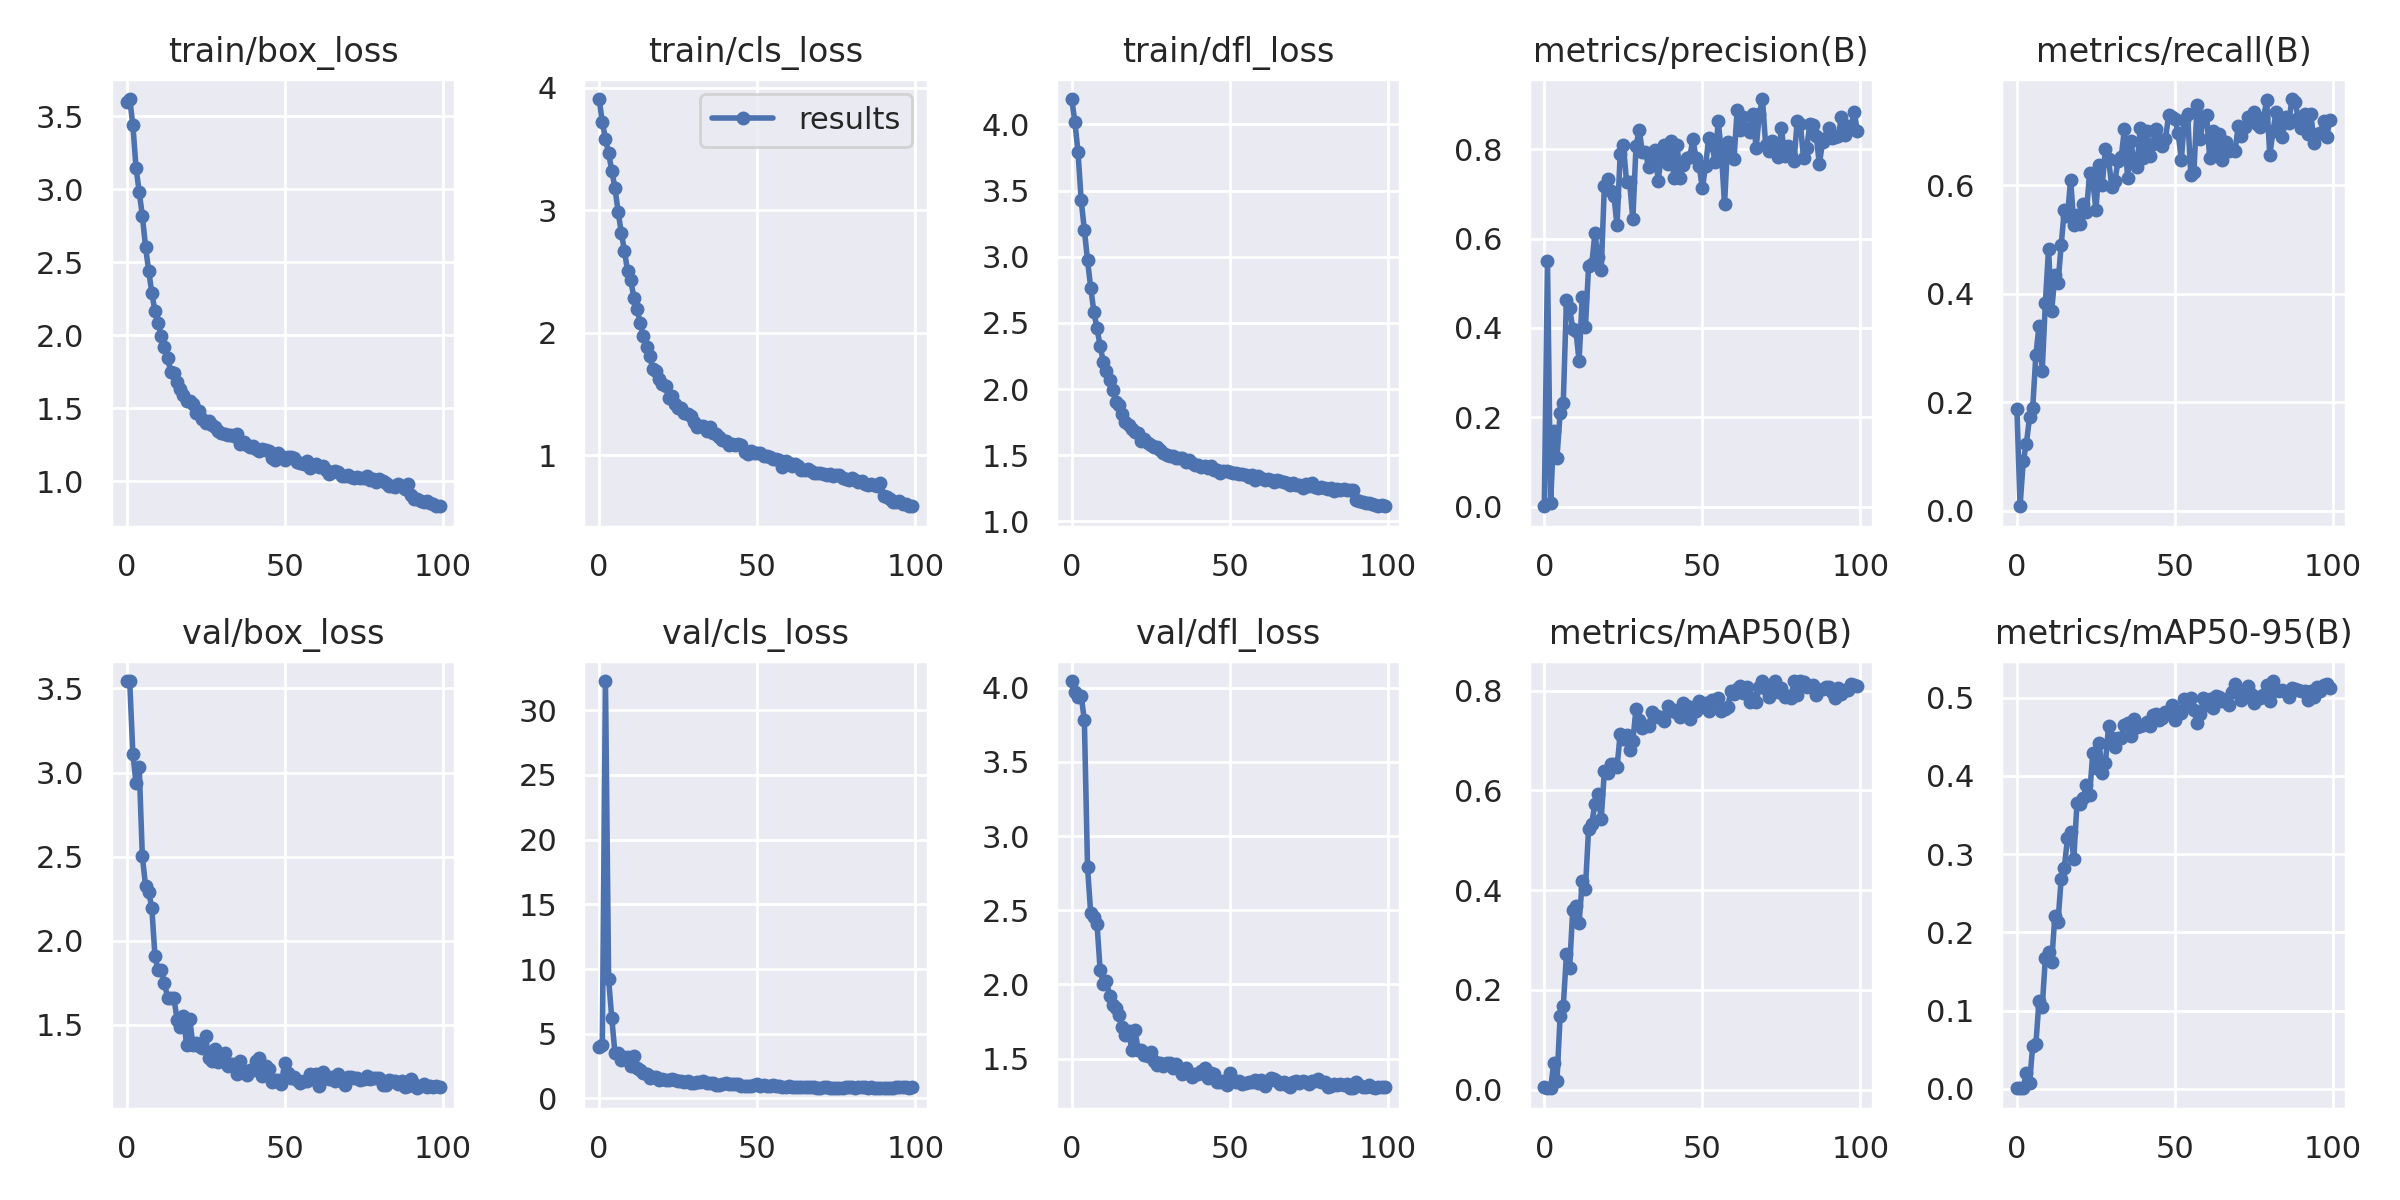

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/results.png', width=600)

/content


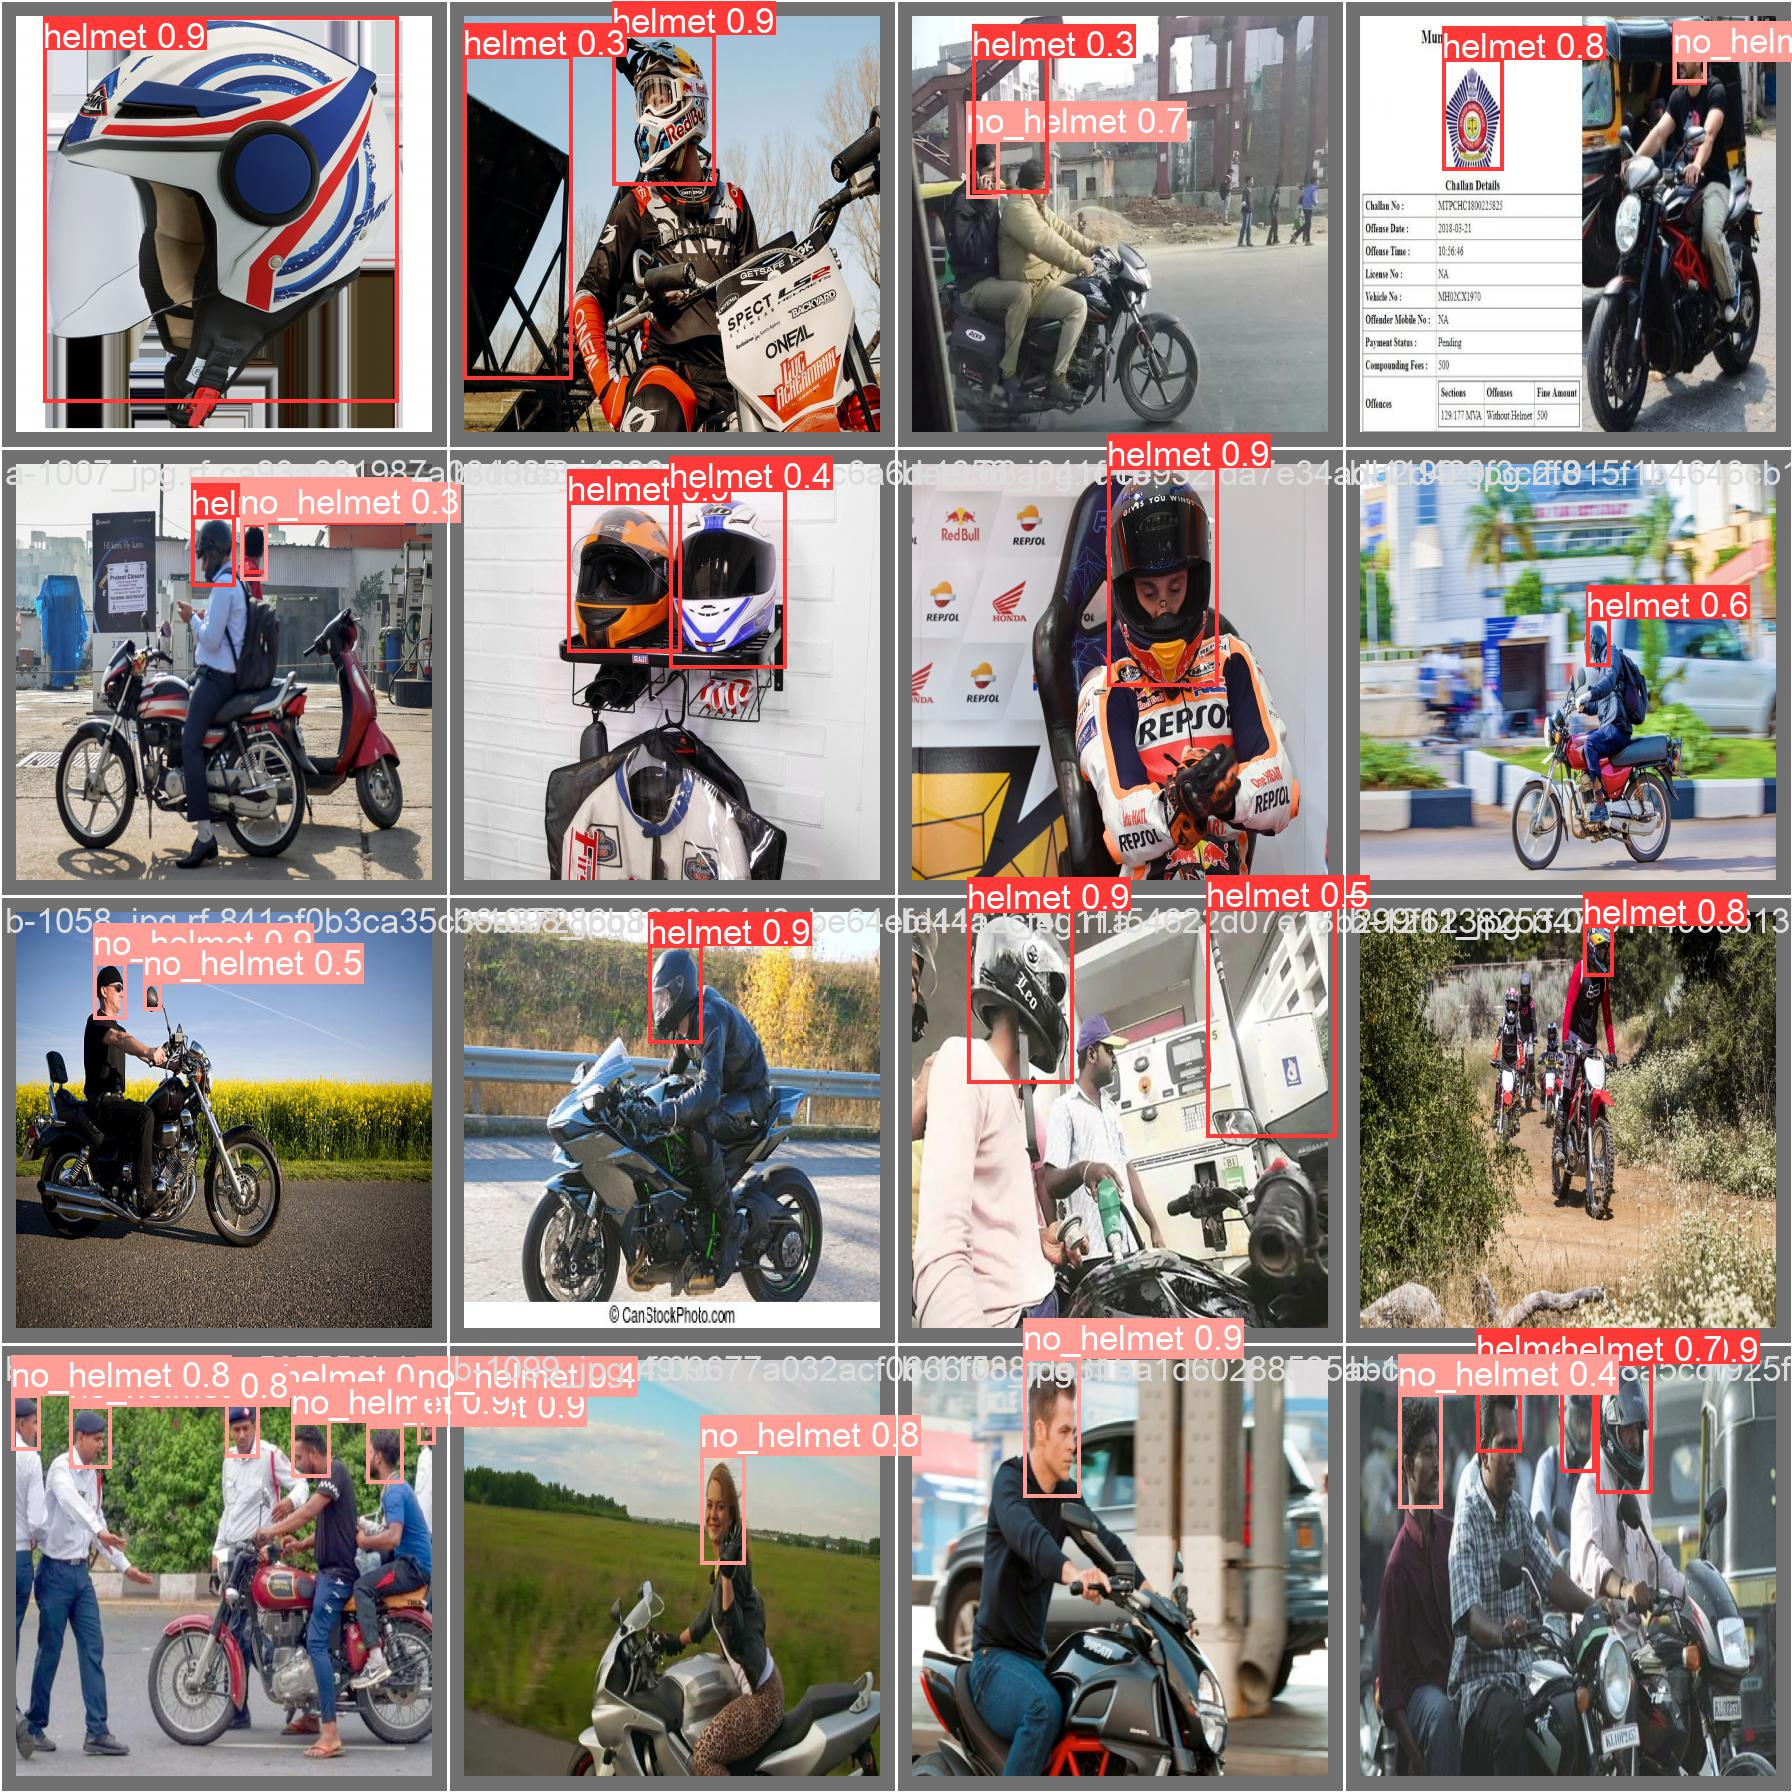

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/val_batch0_pred.jpg', width=600)

#VALIDATION MODEL: 100 EPOCHS



In [ ]:
%cd {HOME}
!yolo task=detect mode=val model="/content/runs/detect/train6/weights/best.pt" data="/content/datasets/helmet_v3-1/data.yaml"

/content
Ultralytics YOLOv8.0.14 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/helmet_v3-1/valid/labels.cache... 162 images, 0 backgrounds, 0 corrupt: 100% 162/162 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:03<00:00,  2.86it/s]
                   all        162        240      0.825      0.621      0.752      0.421
                helmet        162        175      0.748      0.679      0.758      0.439
             no_helmet        162         65      0.902      0.564      0.746      0.403
Speed: 1.6ms pre-process, 4.8ms inference, 0.0ms loss, 2.2ms post-process per image


/content


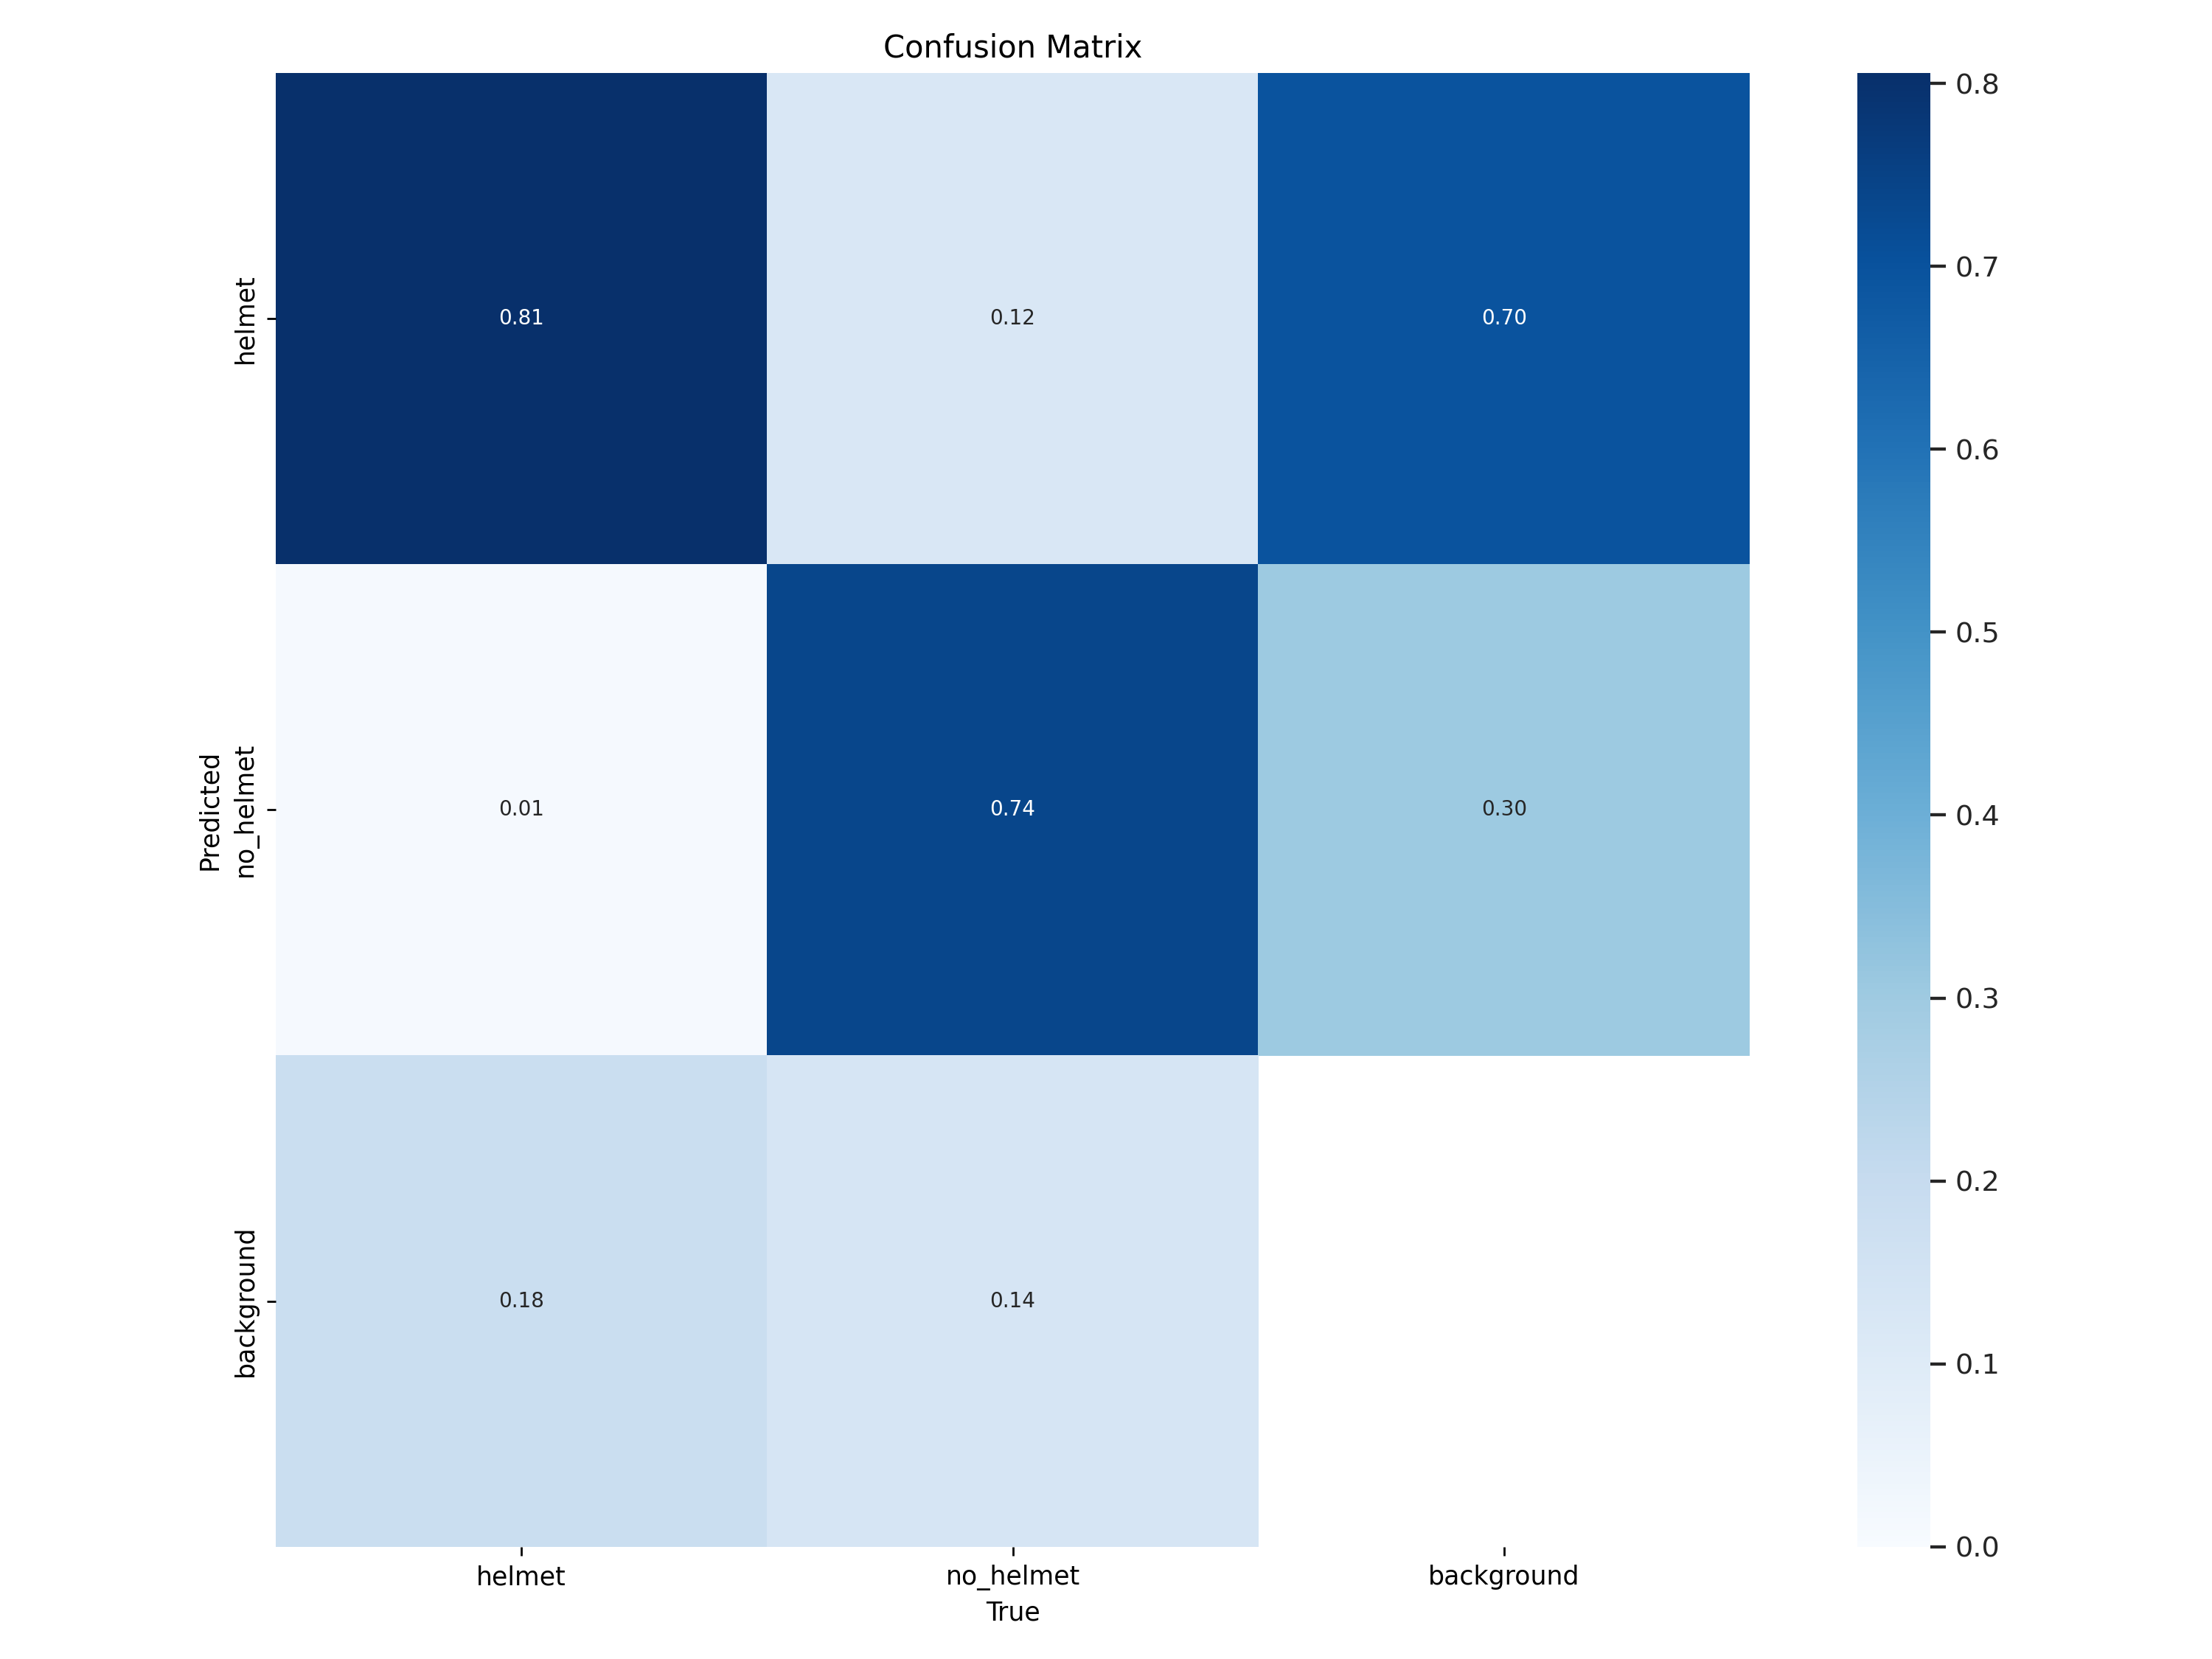

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val5/confusion_matrix.png', width=600)

/content


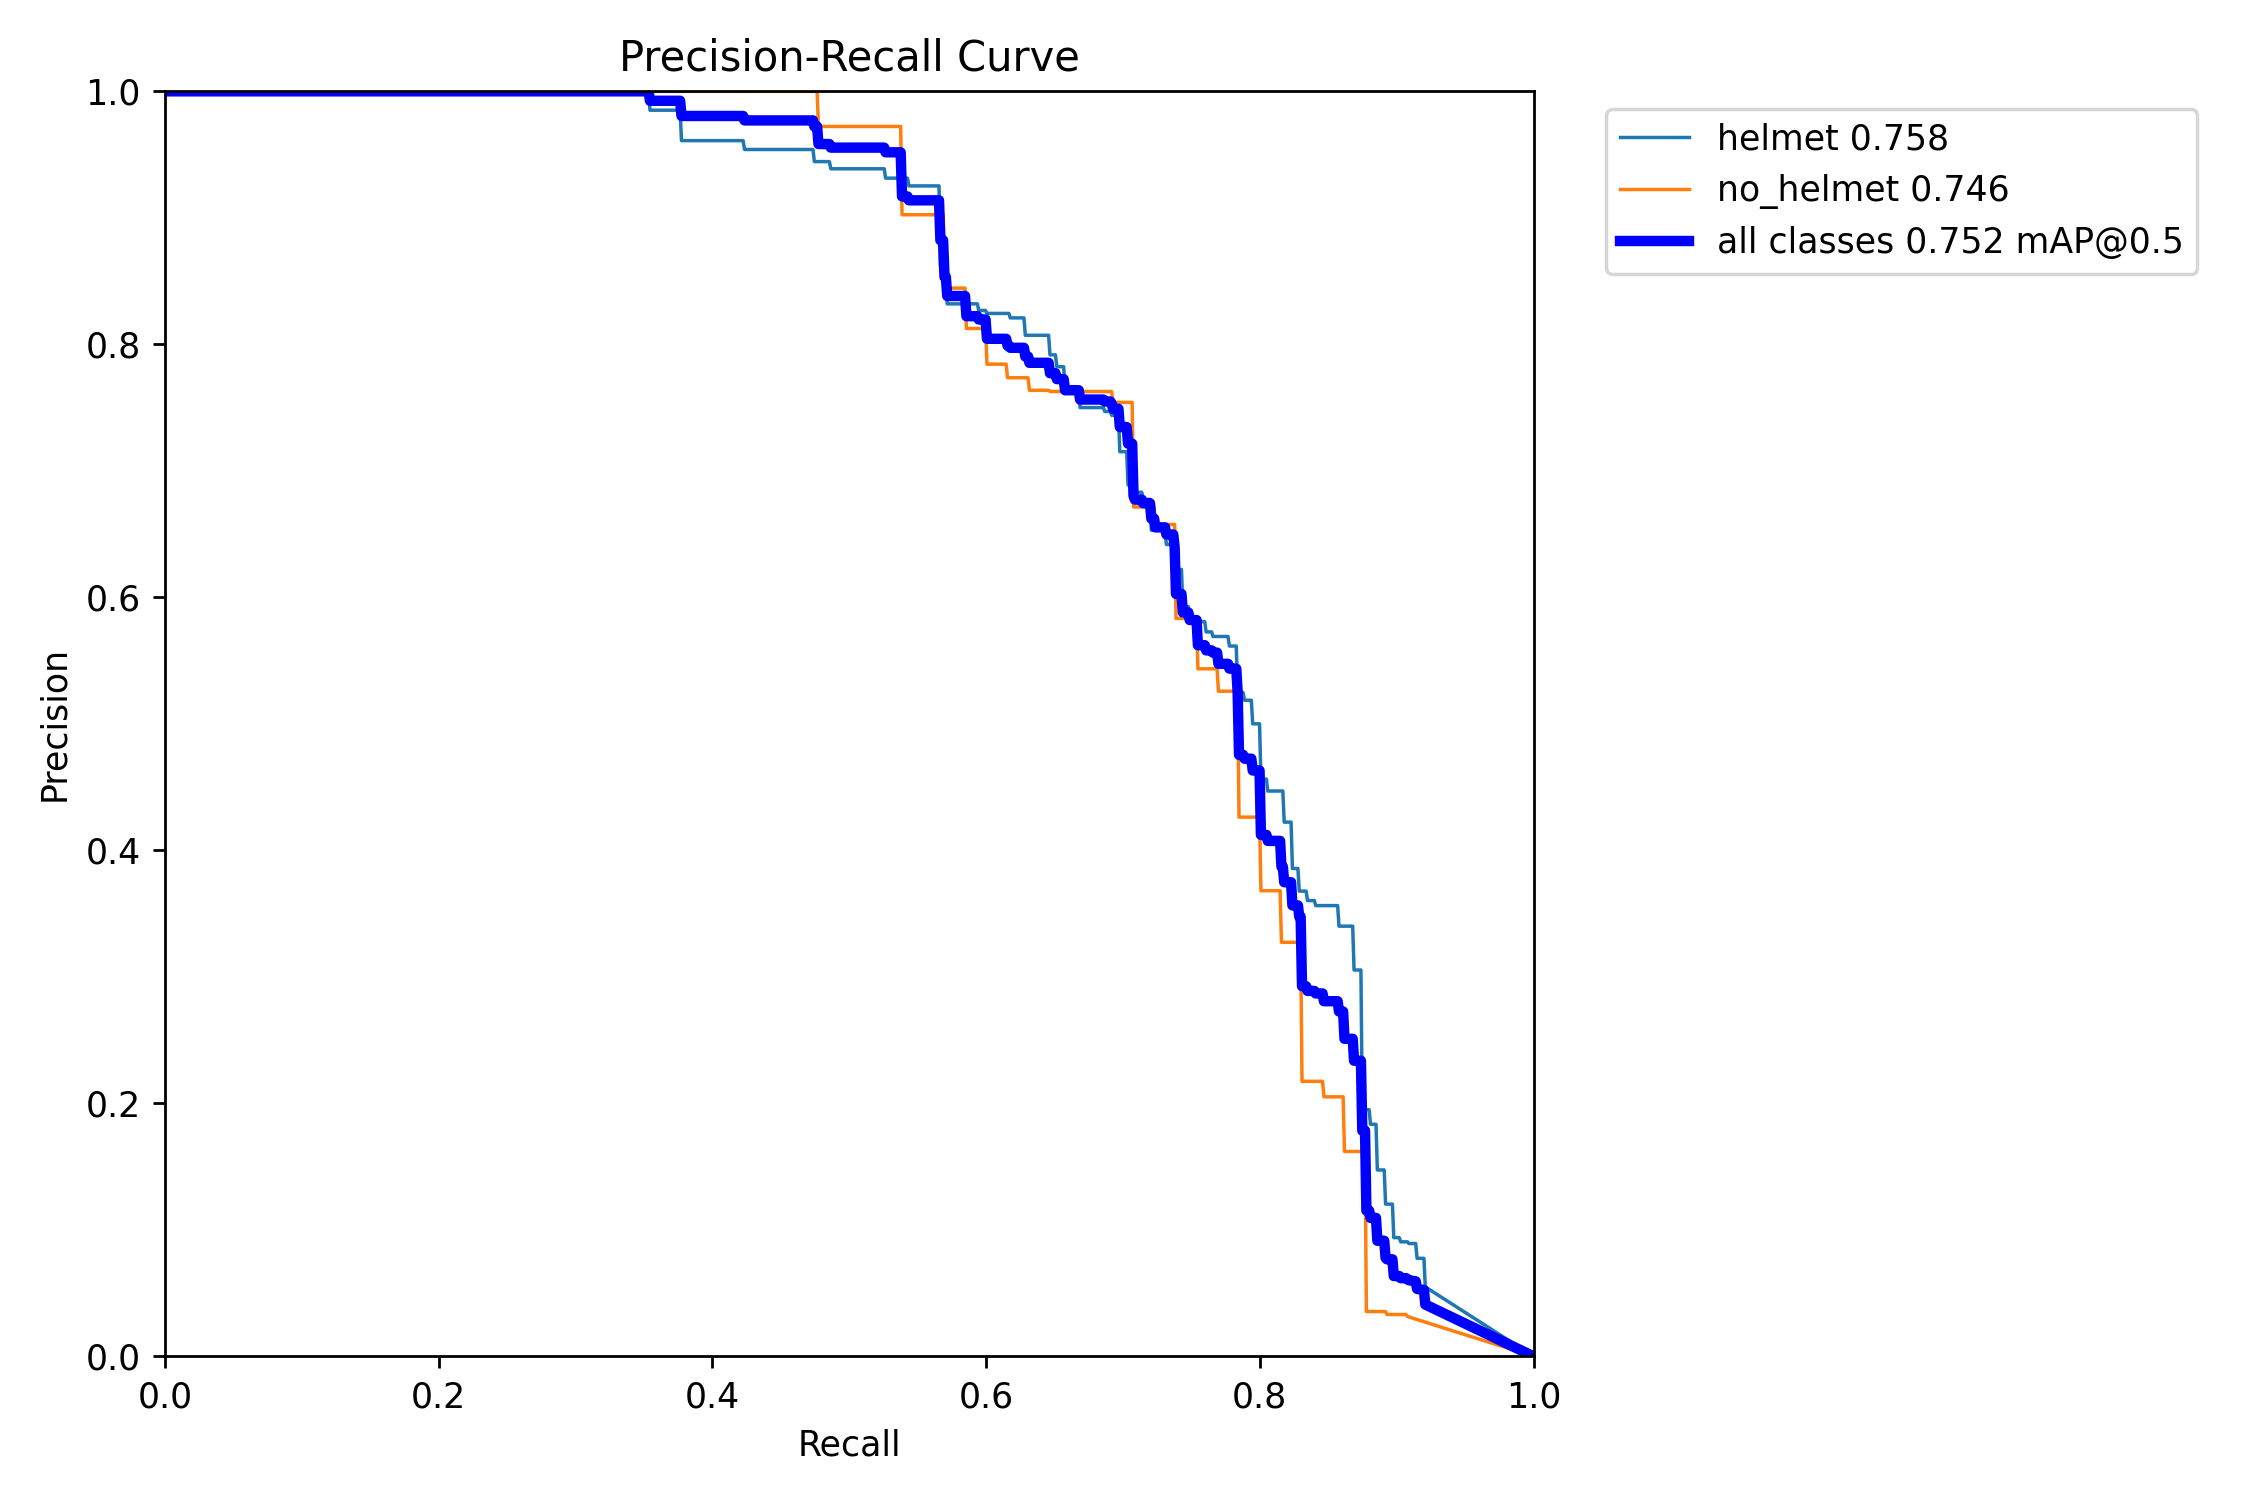

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val5/PR_curve.png', width=600)

#PREDICTION: 100 EPOCHS

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train6/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.14 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
image 1/79 /content/datasets/helmet_v3-1/test/images/a-1004_jpg.rf.e8c5e48c8ccecb5a4f6ef22093657663.jpg: 640x640 1 helmet, 8.6ms
image 2/79 /content/datasets/helmet_v3-1/test/images/a-1005_jpg.rf.aaedbf736dc56ff298f9598b776dd475.jpg: 640x640 1 helmet, 8.6ms
image 3/79 /content/datasets/helmet_v3-1/test/images/a-1020_jpg.rf.d5166db4d6aebe32be0d95d9bbf117fa.jpg: 640x640 2 helmets, 8.2ms
image 4/79 /content/datasets/helmet_v3-1/test/images/a-1050_jpg.rf.3f6d0bc1b666c130f8962bb4eba3e5bc.jpg: 640x640 4 helmets, 8.1ms
image 5/79 /content/datasets/helmet_v3-1/test/images/a-1069_jpg.rf.fd4a4a8e8dde0688972167559dea5d99.jpg: 640x640 2 helmets, 8.0ms
image 6/79 /content/datasets/helmet_v3-1/test/images/a-1085_jpg.rf.b318b9f2985b4532e6982e3c1699a9c5.jpg: 640x640 4 helmets, 8.0ms
image 7/79 /content/datasets/helmet_v3-1/test

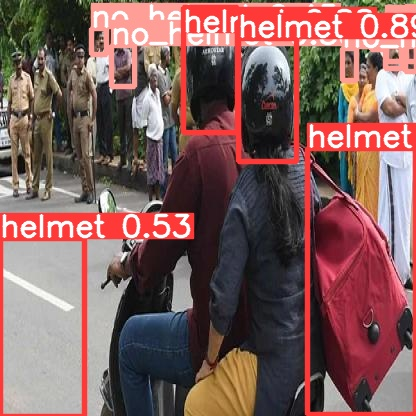

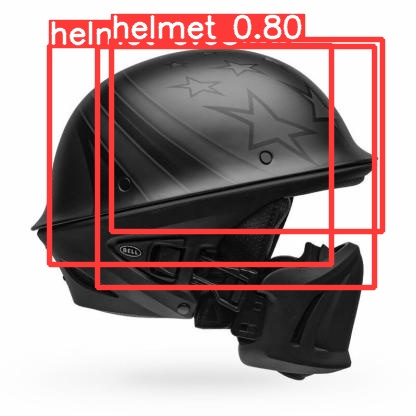

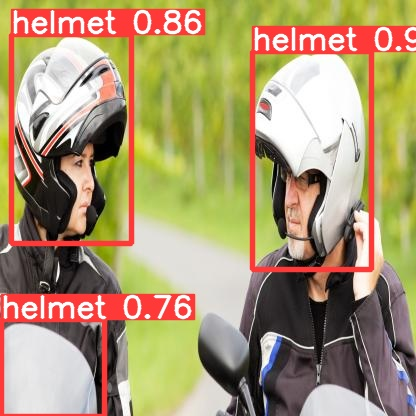

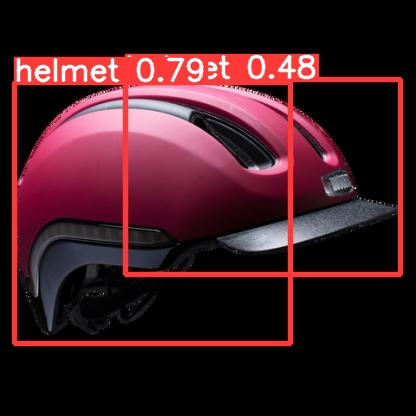

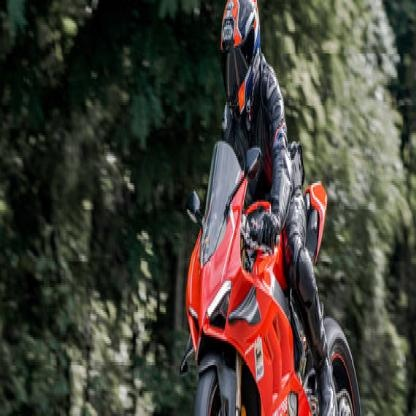

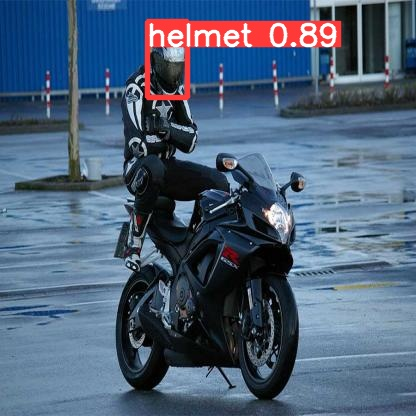

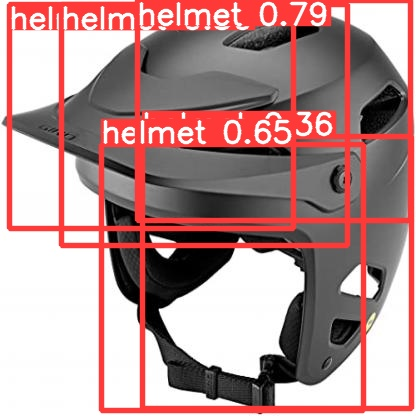

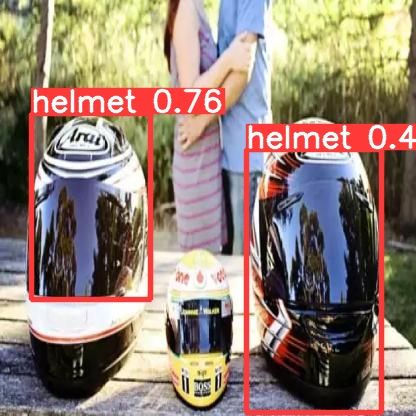

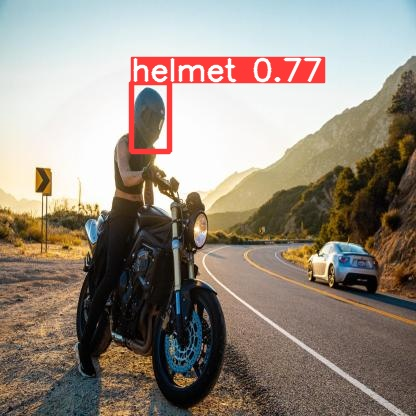

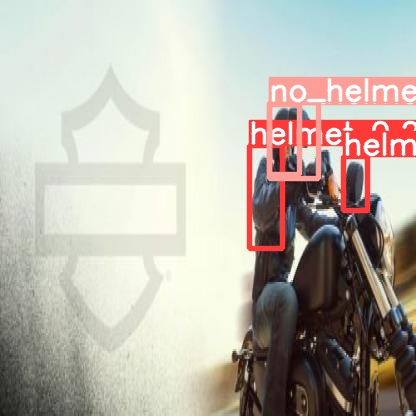

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict4/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")